In [41]:
%load_ext autoreload
%autoreload 2
import torch
import numpy as np
from rl4co.models import AttentionModelPolicy
from rl4co.envs import TSPEnv
from encoder import CustomGATEncoder
from training import train_reinforce
from config import encoder_config, training_config, val_config
from utils import run_tsp_experiments, visualize_tsp_solutions


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
## Initialize policy and environment
num_cities = 20
input_dim = encoder_config['input_dim']
hidden_dim = encoder_config['hidden_dim']
num_gat_layers = encoder_config['num_gat_layers']
num_heads = encoder_config['num_heads']
gat_dropout = encoder_config['gat_p_dropout']
loc_embed_intermediate_dim = encoder_config['loc_embed_intermediate_dim']
loc_embed_p_dropout = encoder_config['loc_embed_p_dropout']

env = TSPEnv(generator_params={'num_loc': num_cities})
custom_gat_encoder = CustomGATEncoder(input_dim = 2, hidden_dim = 128, num_layers = num_gat_layers, num_heads = num_heads, p_dropout = gat_dropout, loc_embed_intermediate_dim=loc_embed_intermediate_dim, loc_embed_p_dropout=loc_embed_p_dropout)

# Keep the default decoder (pointer network) and only utilize our GAT architecture for encoding
policy = AttentionModelPolicy(env_name=env.name, encoder=custom_gat_encoder)

In [28]:
## Training Loop
lr = training_config['learning_rate']
num_epochs = training_config['num_epochs']
train_data_size = training_config['train_data_size']
batch_size = training_config['batch_size']

optimizer = torch.optim.Adam(policy.parameters(), lr=lr)
train_reinforce(
    policy=policy,
    env=env,
    optimizer=optimizer,
    train_data_size=train_data_size,
    num_epochs=num_epochs,
    batch_size = batch_size,
    device='cuda'
)


Epoch 1/1000


100%|██████████| 195/195 [00:05<00:00, 36.94it/s]


Train Loss: -249.4907, Average Reward: -8.8553
Epoch 2/1000


100%|██████████| 195/195 [00:05<00:00, 36.98it/s]


Train Loss: -140.0721, Average Reward: -7.3526
Epoch 3/1000


100%|██████████| 195/195 [00:05<00:00, 37.20it/s]


Train Loss: -100.4984, Average Reward: -6.2172
Epoch 4/1000


100%|██████████| 195/195 [00:05<00:00, 37.34it/s]


Train Loss: -76.6618, Average Reward: -5.6170
Epoch 5/1000


100%|██████████| 195/195 [00:05<00:00, 37.19it/s]


Train Loss: -61.1692, Average Reward: -5.3187
Epoch 6/1000


100%|██████████| 195/195 [00:05<00:00, 37.10it/s]


Train Loss: -51.0822, Average Reward: -5.0939
Epoch 7/1000


100%|██████████| 195/195 [00:05<00:00, 37.09it/s]


Train Loss: -44.6864, Average Reward: -4.9693
Epoch 8/1000


100%|██████████| 195/195 [00:05<00:00, 37.19it/s]


Train Loss: -43.0920, Average Reward: -4.8872
Epoch 9/1000


100%|██████████| 195/195 [00:05<00:00, 36.93it/s]


Train Loss: -40.1915, Average Reward: -4.8353
Epoch 10/1000


100%|██████████| 195/195 [00:05<00:00, 37.07it/s]


Train Loss: -37.0931, Average Reward: -4.8090
Epoch 11/1000


100%|██████████| 195/195 [00:05<00:00, 37.10it/s]


Train Loss: -37.8870, Average Reward: -4.8144
Epoch 12/1000


100%|██████████| 195/195 [00:05<00:00, 37.08it/s]


Train Loss: -35.6968, Average Reward: -4.7896
Epoch 13/1000


100%|██████████| 195/195 [00:05<00:00, 37.37it/s]


Train Loss: -34.7655, Average Reward: -4.7519
Epoch 14/1000


100%|██████████| 195/195 [00:05<00:00, 37.20it/s]


Train Loss: -34.1410, Average Reward: -4.7649
Epoch 15/1000


100%|██████████| 195/195 [00:05<00:00, 37.18it/s]


Train Loss: -39.4704, Average Reward: -4.7993
Epoch 16/1000


100%|██████████| 195/195 [00:05<00:00, 37.17it/s]


Train Loss: -36.1423, Average Reward: -4.7427
Epoch 17/1000


100%|██████████| 195/195 [00:05<00:00, 37.21it/s]


Train Loss: -35.2612, Average Reward: -4.7344
Epoch 18/1000


100%|██████████| 195/195 [00:05<00:00, 37.21it/s]


Train Loss: -32.0201, Average Reward: -4.7093
Epoch 19/1000


100%|██████████| 195/195 [00:05<00:00, 37.35it/s]


Train Loss: -32.8772, Average Reward: -4.7059
Epoch 20/1000


100%|██████████| 195/195 [00:05<00:00, 36.84it/s]


Train Loss: -30.9109, Average Reward: -4.6621
Epoch 21/1000


100%|██████████| 195/195 [00:05<00:00, 36.76it/s]


Train Loss: -32.1674, Average Reward: -4.6634
Epoch 22/1000


100%|██████████| 195/195 [00:05<00:00, 36.81it/s]


Train Loss: -32.5534, Average Reward: -4.6884
Epoch 23/1000


100%|██████████| 195/195 [00:05<00:00, 36.82it/s]


Train Loss: -32.4157, Average Reward: -4.6578
Epoch 24/1000


100%|██████████| 195/195 [00:05<00:00, 36.88it/s]


Train Loss: -32.0932, Average Reward: -4.6588
Epoch 25/1000


100%|██████████| 195/195 [00:05<00:00, 37.16it/s]


Train Loss: -32.7811, Average Reward: -4.6449
Epoch 26/1000


100%|██████████| 195/195 [00:05<00:00, 36.77it/s]


Train Loss: -30.9135, Average Reward: -4.6459
Epoch 27/1000


100%|██████████| 195/195 [00:05<00:00, 36.90it/s]


Train Loss: -30.0243, Average Reward: -4.6459
Epoch 28/1000


100%|██████████| 195/195 [00:05<00:00, 36.98it/s]


Train Loss: -28.2308, Average Reward: -4.6258
Epoch 29/1000


100%|██████████| 195/195 [00:05<00:00, 37.13it/s]


Train Loss: -28.8785, Average Reward: -4.6193
Epoch 30/1000


100%|██████████| 195/195 [00:05<00:00, 37.19it/s]


Train Loss: -27.7253, Average Reward: -4.6101
Epoch 31/1000


100%|██████████| 195/195 [00:05<00:00, 36.93it/s]


Train Loss: -27.1537, Average Reward: -4.5899
Epoch 32/1000


100%|██████████| 195/195 [00:05<00:00, 37.01it/s]


Train Loss: -26.7589, Average Reward: -4.5863
Epoch 33/1000


100%|██████████| 195/195 [00:05<00:00, 37.19it/s]


Train Loss: -29.7855, Average Reward: -4.6217
Epoch 34/1000


100%|██████████| 195/195 [00:05<00:00, 37.19it/s]


Train Loss: -31.6121, Average Reward: -4.6220
Epoch 35/1000


100%|██████████| 195/195 [00:05<00:00, 37.19it/s]


Train Loss: -28.2373, Average Reward: -4.5822
Epoch 36/1000


100%|██████████| 195/195 [00:05<00:00, 37.41it/s]


Train Loss: -29.3049, Average Reward: -4.6027
Epoch 37/1000


100%|██████████| 195/195 [00:05<00:00, 36.81it/s]


Train Loss: -25.6941, Average Reward: -4.5739
Epoch 38/1000


100%|██████████| 195/195 [00:05<00:00, 37.01it/s]


Train Loss: -26.8297, Average Reward: -4.5780
Epoch 39/1000


100%|██████████| 195/195 [00:05<00:00, 37.04it/s]


Train Loss: -26.8134, Average Reward: -4.5747
Epoch 40/1000


100%|██████████| 195/195 [00:05<00:00, 37.11it/s]


Train Loss: -25.9705, Average Reward: -4.5604
Epoch 41/1000


100%|██████████| 195/195 [00:05<00:00, 37.17it/s]


Train Loss: -24.6532, Average Reward: -4.5616
Epoch 42/1000


100%|██████████| 195/195 [00:05<00:00, 37.20it/s]


Train Loss: -24.3977, Average Reward: -4.5669
Epoch 43/1000


100%|██████████| 195/195 [00:05<00:00, 37.12it/s]


Train Loss: -25.6702, Average Reward: -4.5939
Epoch 44/1000


100%|██████████| 195/195 [00:05<00:00, 36.89it/s]


Train Loss: -26.4445, Average Reward: -4.6005
Epoch 45/1000


100%|██████████| 195/195 [00:05<00:00, 37.10it/s]


Train Loss: -25.8439, Average Reward: -4.5913
Epoch 46/1000


100%|██████████| 195/195 [00:05<00:00, 37.13it/s]


Train Loss: -23.8382, Average Reward: -4.5718
Epoch 47/1000


100%|██████████| 195/195 [00:05<00:00, 37.30it/s]


Train Loss: -25.4652, Average Reward: -4.5978
Epoch 48/1000


100%|██████████| 195/195 [00:05<00:00, 37.06it/s]


Train Loss: -23.4318, Average Reward: -4.5605
Epoch 49/1000


100%|██████████| 195/195 [00:05<00:00, 36.97it/s]


Train Loss: -24.9238, Average Reward: -4.5666
Epoch 50/1000


100%|██████████| 195/195 [00:05<00:00, 36.82it/s]


Train Loss: -25.8122, Average Reward: -4.5573
Epoch 51/1000


100%|██████████| 195/195 [00:05<00:00, 36.86it/s]


Train Loss: -23.8693, Average Reward: -4.5671
Epoch 52/1000


100%|██████████| 195/195 [00:05<00:00, 36.85it/s]


Train Loss: -29.1000, Average Reward: -4.6237
Epoch 53/1000


100%|██████████| 195/195 [00:05<00:00, 37.09it/s]


Train Loss: -27.3652, Average Reward: -4.5892
Epoch 54/1000


100%|██████████| 195/195 [00:05<00:00, 36.92it/s]


Train Loss: -24.0038, Average Reward: -4.5470
Epoch 55/1000


100%|██████████| 195/195 [00:05<00:00, 36.87it/s]


Train Loss: -23.3758, Average Reward: -4.5466
Epoch 56/1000


100%|██████████| 195/195 [00:05<00:00, 36.93it/s]


Train Loss: -25.6456, Average Reward: -4.5566
Epoch 57/1000


100%|██████████| 195/195 [00:05<00:00, 36.97it/s]


Train Loss: -24.3459, Average Reward: -4.5306
Epoch 58/1000


100%|██████████| 195/195 [00:05<00:00, 37.17it/s]


Train Loss: -26.1774, Average Reward: -4.5641
Epoch 59/1000


100%|██████████| 195/195 [00:05<00:00, 36.88it/s]


Train Loss: -25.0247, Average Reward: -4.5473
Epoch 60/1000


100%|██████████| 195/195 [00:05<00:00, 36.86it/s]


Train Loss: -26.1739, Average Reward: -4.5489
Epoch 61/1000


100%|██████████| 195/195 [00:05<00:00, 36.89it/s]


Train Loss: -24.3257, Average Reward: -4.5187
Epoch 62/1000


100%|██████████| 195/195 [00:05<00:00, 36.93it/s]


Train Loss: -23.3129, Average Reward: -4.5085
Epoch 63/1000


100%|██████████| 195/195 [00:05<00:00, 37.09it/s]


Train Loss: -23.6500, Average Reward: -4.5238
Epoch 64/1000


100%|██████████| 195/195 [00:05<00:00, 37.02it/s]


Train Loss: -23.7383, Average Reward: -4.5334
Epoch 65/1000


100%|██████████| 195/195 [00:05<00:00, 36.96it/s]


Train Loss: -24.0000, Average Reward: -4.5076
Epoch 66/1000


100%|██████████| 195/195 [00:05<00:00, 37.04it/s]


Train Loss: -23.8492, Average Reward: -4.5057
Epoch 67/1000


100%|██████████| 195/195 [00:05<00:00, 37.10it/s]


Train Loss: -23.0781, Average Reward: -4.4885
Epoch 68/1000


100%|██████████| 195/195 [00:05<00:00, 37.46it/s]


Train Loss: -23.2854, Average Reward: -4.4960
Epoch 69/1000


100%|██████████| 195/195 [00:05<00:00, 37.42it/s]


Train Loss: -24.4384, Average Reward: -4.5059
Epoch 70/1000


100%|██████████| 195/195 [00:05<00:00, 36.96it/s]


Train Loss: -24.6489, Average Reward: -4.5149
Epoch 71/1000


100%|██████████| 195/195 [00:05<00:00, 37.23it/s]


Train Loss: -24.6871, Average Reward: -4.5145
Epoch 72/1000


100%|██████████| 195/195 [00:05<00:00, 36.85it/s]


Train Loss: -27.6504, Average Reward: -4.5444
Epoch 73/1000


100%|██████████| 195/195 [00:05<00:00, 36.85it/s]


Train Loss: -24.0357, Average Reward: -4.4935
Epoch 74/1000


100%|██████████| 195/195 [00:05<00:00, 36.90it/s]


Train Loss: -22.9923, Average Reward: -4.4978
Epoch 75/1000


100%|██████████| 195/195 [00:05<00:00, 36.94it/s]


Train Loss: -25.2813, Average Reward: -4.5307
Epoch 76/1000


100%|██████████| 195/195 [00:05<00:00, 37.18it/s]


Train Loss: -24.3001, Average Reward: -4.5150
Epoch 77/1000


100%|██████████| 195/195 [00:05<00:00, 37.10it/s]


Train Loss: -24.3566, Average Reward: -4.5230
Epoch 78/1000


100%|██████████| 195/195 [00:05<00:00, 37.20it/s]


Train Loss: -26.0547, Average Reward: -4.5534
Epoch 79/1000


100%|██████████| 195/195 [00:05<00:00, 37.24it/s]


Train Loss: -22.4771, Average Reward: -4.5038
Epoch 80/1000


100%|██████████| 195/195 [00:05<00:00, 37.22it/s]


Train Loss: -20.8934, Average Reward: -4.4826
Epoch 81/1000


100%|██████████| 195/195 [00:05<00:00, 37.11it/s]


Train Loss: -24.0033, Average Reward: -4.5017
Epoch 82/1000


100%|██████████| 195/195 [00:05<00:00, 37.38it/s]


Train Loss: -23.2204, Average Reward: -4.4889
Epoch 83/1000


100%|██████████| 195/195 [00:05<00:00, 37.19it/s]


Train Loss: -21.7536, Average Reward: -4.5070
Epoch 84/1000


100%|██████████| 195/195 [00:05<00:00, 36.60it/s]


Train Loss: -24.4129, Average Reward: -4.5070
Epoch 85/1000


100%|██████████| 195/195 [00:05<00:00, 37.04it/s]


Train Loss: -22.8140, Average Reward: -4.4986
Epoch 86/1000


100%|██████████| 195/195 [00:05<00:00, 37.08it/s]


Train Loss: -22.0142, Average Reward: -4.4856
Epoch 87/1000


100%|██████████| 195/195 [00:05<00:00, 37.16it/s]


Train Loss: -20.8612, Average Reward: -4.4808
Epoch 88/1000


100%|██████████| 195/195 [00:05<00:00, 37.29it/s]


Train Loss: -20.6110, Average Reward: -4.4883
Epoch 89/1000


100%|██████████| 195/195 [00:05<00:00, 36.93it/s]


Train Loss: -21.0369, Average Reward: -4.4731
Epoch 90/1000


100%|██████████| 195/195 [00:05<00:00, 37.02it/s]


Train Loss: -27.4952, Average Reward: -4.5669
Epoch 91/1000


100%|██████████| 195/195 [00:05<00:00, 36.99it/s]


Train Loss: -23.2922, Average Reward: -4.5092
Epoch 92/1000


100%|██████████| 195/195 [00:05<00:00, 36.92it/s]


Train Loss: -23.1250, Average Reward: -4.4966
Epoch 93/1000


100%|██████████| 195/195 [00:05<00:00, 37.07it/s]


Train Loss: -21.9303, Average Reward: -4.4818
Epoch 94/1000


100%|██████████| 195/195 [00:05<00:00, 36.87it/s]


Train Loss: -20.3499, Average Reward: -4.4730
Epoch 95/1000


100%|██████████| 195/195 [00:05<00:00, 36.86it/s]


Train Loss: -21.7961, Average Reward: -4.4911
Epoch 96/1000


100%|██████████| 195/195 [00:05<00:00, 37.00it/s]


Train Loss: -21.2596, Average Reward: -4.4815
Epoch 97/1000


100%|██████████| 195/195 [00:05<00:00, 37.05it/s]


Train Loss: -20.7321, Average Reward: -4.4923
Epoch 98/1000


100%|██████████| 195/195 [00:05<00:00, 37.28it/s]


Train Loss: -20.0451, Average Reward: -4.4869
Epoch 99/1000


100%|██████████| 195/195 [00:05<00:00, 37.42it/s]


Train Loss: -21.0496, Average Reward: -4.5230
Epoch 100/1000


100%|██████████| 195/195 [00:05<00:00, 37.07it/s]


Train Loss: -20.7624, Average Reward: -4.4917
Epoch 101/1000


100%|██████████| 195/195 [00:05<00:00, 37.13it/s]


Train Loss: -22.1846, Average Reward: -4.4853
Epoch 102/1000


100%|██████████| 195/195 [00:05<00:00, 37.09it/s]


Train Loss: -23.1589, Average Reward: -4.5059
Epoch 103/1000


100%|██████████| 195/195 [00:05<00:00, 37.14it/s]


Train Loss: -20.8199, Average Reward: -4.4543
Epoch 104/1000


100%|██████████| 195/195 [00:05<00:00, 37.25it/s]


Train Loss: -22.6680, Average Reward: -4.4710
Epoch 105/1000


100%|██████████| 195/195 [00:05<00:00, 37.04it/s]


Train Loss: -22.7186, Average Reward: -4.4683
Epoch 106/1000


100%|██████████| 195/195 [00:05<00:00, 36.98it/s]


Train Loss: -19.9819, Average Reward: -4.4616
Epoch 107/1000


100%|██████████| 195/195 [00:05<00:00, 36.93it/s]


Train Loss: -21.3074, Average Reward: -4.4605
Epoch 108/1000


100%|██████████| 195/195 [00:05<00:00, 37.19it/s]


Train Loss: -20.4652, Average Reward: -4.4680
Epoch 109/1000


100%|██████████| 195/195 [00:05<00:00, 37.00it/s]


Train Loss: -21.1665, Average Reward: -4.5028
Epoch 110/1000


100%|██████████| 195/195 [00:05<00:00, 37.23it/s]


Train Loss: -24.7352, Average Reward: -4.5120
Epoch 111/1000


100%|██████████| 195/195 [00:05<00:00, 37.22it/s]


Train Loss: -21.6922, Average Reward: -4.4875
Epoch 112/1000


100%|██████████| 195/195 [00:05<00:00, 37.26it/s]


Train Loss: -20.7007, Average Reward: -4.4841
Epoch 113/1000


100%|██████████| 195/195 [00:05<00:00, 37.25it/s]


Train Loss: -19.6761, Average Reward: -4.4669
Epoch 114/1000


100%|██████████| 195/195 [00:05<00:00, 37.10it/s]


Train Loss: -19.4293, Average Reward: -4.4547
Epoch 115/1000


100%|██████████| 195/195 [00:05<00:00, 37.24it/s]


Train Loss: -19.9867, Average Reward: -4.4903
Epoch 116/1000


100%|██████████| 195/195 [00:05<00:00, 37.27it/s]


Train Loss: -20.8903, Average Reward: -4.4825
Epoch 117/1000


100%|██████████| 195/195 [00:05<00:00, 37.06it/s]


Train Loss: -20.4039, Average Reward: -4.5054
Epoch 118/1000


100%|██████████| 195/195 [00:05<00:00, 36.94it/s]


Train Loss: -21.8569, Average Reward: -4.5548
Epoch 119/1000


100%|██████████| 195/195 [00:05<00:00, 36.98it/s]


Train Loss: -21.1104, Average Reward: -4.4908
Epoch 120/1000


100%|██████████| 195/195 [00:05<00:00, 36.97it/s]


Train Loss: -21.3900, Average Reward: -4.5057
Epoch 121/1000


100%|██████████| 195/195 [00:05<00:00, 37.24it/s]


Train Loss: -21.5590, Average Reward: -4.4896
Epoch 122/1000


100%|██████████| 195/195 [00:05<00:00, 37.02it/s]


Train Loss: -22.6771, Average Reward: -4.4906
Epoch 123/1000


100%|██████████| 195/195 [00:05<00:00, 36.99it/s]


Train Loss: -22.1639, Average Reward: -4.4943
Epoch 124/1000


100%|██████████| 195/195 [00:05<00:00, 37.13it/s]


Train Loss: -22.6708, Average Reward: -4.4745
Epoch 125/1000


100%|██████████| 195/195 [00:05<00:00, 37.13it/s]


Train Loss: -20.4253, Average Reward: -4.4481
Epoch 126/1000


100%|██████████| 195/195 [00:05<00:00, 37.23it/s]


Train Loss: -21.6152, Average Reward: -4.4554
Epoch 127/1000


100%|██████████| 195/195 [00:05<00:00, 37.27it/s]


Train Loss: -18.3841, Average Reward: -4.4526
Epoch 128/1000


100%|██████████| 195/195 [00:05<00:00, 36.91it/s]


Train Loss: -19.8920, Average Reward: -4.4491
Epoch 129/1000


100%|██████████| 195/195 [00:05<00:00, 37.09it/s]


Train Loss: -21.4608, Average Reward: -4.4646
Epoch 130/1000


100%|██████████| 195/195 [00:05<00:00, 37.01it/s]


Train Loss: -21.9973, Average Reward: -4.4595
Epoch 131/1000


100%|██████████| 195/195 [00:05<00:00, 36.87it/s]


Train Loss: -22.3281, Average Reward: -4.5119
Epoch 132/1000


100%|██████████| 195/195 [00:05<00:00, 37.06it/s]


Train Loss: -21.3988, Average Reward: -4.4713
Epoch 133/1000


100%|██████████| 195/195 [00:05<00:00, 37.25it/s]


Train Loss: -21.4235, Average Reward: -4.4553
Epoch 134/1000


100%|██████████| 195/195 [00:05<00:00, 37.23it/s]


Train Loss: -22.2036, Average Reward: -4.4773
Epoch 135/1000


100%|██████████| 195/195 [00:05<00:00, 37.24it/s]


Train Loss: -21.1282, Average Reward: -4.4707
Epoch 136/1000


100%|██████████| 195/195 [00:05<00:00, 37.24it/s]


Train Loss: -19.7818, Average Reward: -4.4535
Epoch 137/1000


100%|██████████| 195/195 [00:05<00:00, 37.23it/s]


Train Loss: -21.5800, Average Reward: -4.4952
Epoch 138/1000


100%|██████████| 195/195 [00:05<00:00, 37.24it/s]


Train Loss: -22.7948, Average Reward: -4.4928
Epoch 139/1000


100%|██████████| 195/195 [00:05<00:00, 37.18it/s]


Train Loss: -19.9529, Average Reward: -4.4668
Epoch 140/1000


100%|██████████| 195/195 [00:05<00:00, 37.26it/s]


Train Loss: -19.6456, Average Reward: -4.4459
Epoch 141/1000


100%|██████████| 195/195 [00:05<00:00, 37.24it/s]


Train Loss: -17.9102, Average Reward: -4.4375
Epoch 142/1000


100%|██████████| 195/195 [00:05<00:00, 37.33it/s]


Train Loss: -18.8448, Average Reward: -4.4950
Epoch 143/1000


100%|██████████| 195/195 [00:05<00:00, 37.57it/s]


Train Loss: -18.0541, Average Reward: -4.4343
Epoch 144/1000


100%|██████████| 195/195 [00:05<00:00, 37.13it/s]


Train Loss: -17.5474, Average Reward: -4.4486
Epoch 145/1000


100%|██████████| 195/195 [00:05<00:00, 37.08it/s]


Train Loss: -19.6008, Average Reward: -4.4491
Epoch 146/1000


100%|██████████| 195/195 [00:05<00:00, 36.93it/s]


Train Loss: -20.1831, Average Reward: -4.4323
Epoch 147/1000


100%|██████████| 195/195 [00:05<00:00, 37.00it/s]


Train Loss: -19.1937, Average Reward: -4.4398
Epoch 148/1000


100%|██████████| 195/195 [00:05<00:00, 36.97it/s]


Train Loss: -19.1187, Average Reward: -4.4312
Epoch 149/1000


100%|██████████| 195/195 [00:05<00:00, 37.31it/s]


Train Loss: -20.4769, Average Reward: -4.4640
Epoch 150/1000


100%|██████████| 195/195 [00:05<00:00, 36.72it/s]


Train Loss: -20.2224, Average Reward: -4.4347
Epoch 151/1000


100%|██████████| 195/195 [00:05<00:00, 36.86it/s]


Train Loss: -23.4921, Average Reward: -4.4660
Epoch 152/1000


100%|██████████| 195/195 [00:05<00:00, 36.96it/s]


Train Loss: -20.8687, Average Reward: -4.4492
Epoch 153/1000


100%|██████████| 195/195 [00:05<00:00, 37.15it/s]


Train Loss: -17.9443, Average Reward: -4.4253
Epoch 154/1000


100%|██████████| 195/195 [00:05<00:00, 37.21it/s]


Train Loss: -19.1102, Average Reward: -4.4558
Epoch 155/1000


100%|██████████| 195/195 [00:05<00:00, 37.02it/s]


Train Loss: -17.8134, Average Reward: -4.4229
Epoch 156/1000


100%|██████████| 195/195 [00:05<00:00, 37.11it/s]


Train Loss: -20.5085, Average Reward: -4.4481
Epoch 157/1000


100%|██████████| 195/195 [00:05<00:00, 37.16it/s]


Train Loss: -20.3684, Average Reward: -4.4419
Epoch 158/1000


100%|██████████| 195/195 [00:05<00:00, 37.14it/s]


Train Loss: -19.6508, Average Reward: -4.4465
Epoch 159/1000


100%|██████████| 195/195 [00:05<00:00, 36.96it/s]


Train Loss: -18.6476, Average Reward: -4.4192
Epoch 160/1000


100%|██████████| 195/195 [00:05<00:00, 37.23it/s]


Train Loss: -18.9712, Average Reward: -4.4355
Epoch 161/1000


100%|██████████| 195/195 [00:05<00:00, 36.92it/s]


Train Loss: -21.1214, Average Reward: -4.4516
Epoch 162/1000


100%|██████████| 195/195 [00:05<00:00, 37.10it/s]


Train Loss: -18.8246, Average Reward: -4.4341
Epoch 163/1000


100%|██████████| 195/195 [00:05<00:00, 37.15it/s]


Train Loss: -18.2771, Average Reward: -4.4468
Epoch 164/1000


100%|██████████| 195/195 [00:05<00:00, 37.21it/s]


Train Loss: -19.5726, Average Reward: -4.4493
Epoch 165/1000


100%|██████████| 195/195 [00:05<00:00, 37.24it/s]


Train Loss: -19.1088, Average Reward: -4.4540
Epoch 166/1000


100%|██████████| 195/195 [00:05<00:00, 37.18it/s]


Train Loss: -18.6736, Average Reward: -4.4546
Epoch 167/1000


100%|██████████| 195/195 [00:05<00:00, 37.17it/s]


Train Loss: -20.5152, Average Reward: -4.4489
Epoch 168/1000


100%|██████████| 195/195 [00:05<00:00, 37.10it/s]


Train Loss: -19.8584, Average Reward: -4.4522
Epoch 169/1000


100%|██████████| 195/195 [00:05<00:00, 37.04it/s]


Train Loss: -20.8802, Average Reward: -4.4601
Epoch 170/1000


100%|██████████| 195/195 [00:05<00:00, 37.24it/s]


Train Loss: -22.9980, Average Reward: -4.4983
Epoch 171/1000


100%|██████████| 195/195 [00:05<00:00, 37.28it/s]


Train Loss: -21.5977, Average Reward: -4.4631
Epoch 172/1000


100%|██████████| 195/195 [00:05<00:00, 37.19it/s]


Train Loss: -20.9460, Average Reward: -4.4648
Epoch 173/1000


100%|██████████| 195/195 [00:05<00:00, 37.30it/s]


Train Loss: -20.5172, Average Reward: -4.4835
Epoch 174/1000


100%|██████████| 195/195 [00:05<00:00, 37.21it/s]


Train Loss: -23.4565, Average Reward: -4.4848
Epoch 175/1000


100%|██████████| 195/195 [00:05<00:00, 37.34it/s]


Train Loss: -18.9074, Average Reward: -4.4804
Epoch 176/1000


100%|██████████| 195/195 [00:05<00:00, 37.28it/s]


Train Loss: -19.3806, Average Reward: -4.4505
Epoch 177/1000


100%|██████████| 195/195 [00:05<00:00, 37.37it/s]


Train Loss: -18.0394, Average Reward: -4.4204
Epoch 178/1000


100%|██████████| 195/195 [00:05<00:00, 37.18it/s]


Train Loss: -23.1353, Average Reward: -4.4945
Epoch 179/1000


100%|██████████| 195/195 [00:05<00:00, 37.24it/s]


Train Loss: -20.6781, Average Reward: -4.4450
Epoch 180/1000


100%|██████████| 195/195 [00:05<00:00, 37.31it/s]


Train Loss: -18.8450, Average Reward: -4.4383
Epoch 181/1000


100%|██████████| 195/195 [00:05<00:00, 37.24it/s]


Train Loss: -19.8390, Average Reward: -4.4209
Epoch 182/1000


100%|██████████| 195/195 [00:05<00:00, 37.30it/s]


Train Loss: -22.8978, Average Reward: -4.4669
Epoch 183/1000


100%|██████████| 195/195 [00:05<00:00, 37.37it/s]


Train Loss: -17.2273, Average Reward: -4.4386
Epoch 184/1000


100%|██████████| 195/195 [00:05<00:00, 37.43it/s]


Train Loss: -20.2866, Average Reward: -4.4496
Epoch 185/1000


100%|██████████| 195/195 [00:05<00:00, 37.40it/s]


Train Loss: -18.3510, Average Reward: -4.4209
Epoch 186/1000


100%|██████████| 195/195 [00:05<00:00, 37.49it/s]


Train Loss: -16.4077, Average Reward: -4.4180
Epoch 187/1000


100%|██████████| 195/195 [00:05<00:00, 37.48it/s]


Train Loss: -18.2863, Average Reward: -4.4309
Epoch 188/1000


100%|██████████| 195/195 [00:05<00:00, 37.29it/s]


Train Loss: -17.8171, Average Reward: -4.4132
Epoch 189/1000


100%|██████████| 195/195 [00:05<00:00, 37.01it/s]


Train Loss: -17.7002, Average Reward: -4.4287
Epoch 190/1000


100%|██████████| 195/195 [00:05<00:00, 36.76it/s]


Train Loss: -20.3455, Average Reward: -4.4677
Epoch 191/1000


100%|██████████| 195/195 [00:05<00:00, 36.84it/s]


Train Loss: -18.3439, Average Reward: -4.4129
Epoch 192/1000


100%|██████████| 195/195 [00:05<00:00, 36.88it/s]


Train Loss: -20.2553, Average Reward: -4.4128
Epoch 193/1000


100%|██████████| 195/195 [00:05<00:00, 37.21it/s]


Train Loss: -20.2022, Average Reward: -4.4088
Epoch 194/1000


100%|██████████| 195/195 [00:05<00:00, 37.16it/s]


Train Loss: -19.6706, Average Reward: -4.4070
Epoch 195/1000


100%|██████████| 195/195 [00:05<00:00, 37.10it/s]


Train Loss: -17.7764, Average Reward: -4.4122
Epoch 196/1000


100%|██████████| 195/195 [00:05<00:00, 37.08it/s]


Train Loss: -18.5487, Average Reward: -4.4043
Epoch 197/1000


100%|██████████| 195/195 [00:05<00:00, 37.07it/s]


Train Loss: -18.5589, Average Reward: -4.4081
Epoch 198/1000


100%|██████████| 195/195 [00:05<00:00, 37.07it/s]


Train Loss: -18.5579, Average Reward: -4.4304
Epoch 199/1000


100%|██████████| 195/195 [00:05<00:00, 37.06it/s]


Train Loss: -20.8370, Average Reward: -4.4404
Epoch 200/1000


100%|██████████| 195/195 [00:05<00:00, 37.11it/s]


Train Loss: -18.8955, Average Reward: -4.4228
Epoch 201/1000


100%|██████████| 195/195 [00:05<00:00, 36.88it/s]


Train Loss: -18.8463, Average Reward: -4.4400
Epoch 202/1000


100%|██████████| 195/195 [00:05<00:00, 36.75it/s]


Train Loss: -21.7195, Average Reward: -4.4561
Epoch 203/1000


100%|██████████| 195/195 [00:05<00:00, 37.04it/s]


Train Loss: -18.7890, Average Reward: -4.4130
Epoch 204/1000


100%|██████████| 195/195 [00:05<00:00, 36.79it/s]


Train Loss: -17.7253, Average Reward: -4.3919
Epoch 205/1000


100%|██████████| 195/195 [00:05<00:00, 36.83it/s]


Train Loss: -17.0059, Average Reward: -4.4131
Epoch 206/1000


100%|██████████| 195/195 [00:05<00:00, 37.07it/s]


Train Loss: -17.7313, Average Reward: -4.4172
Epoch 207/1000


100%|██████████| 195/195 [00:05<00:00, 37.04it/s]


Train Loss: -19.0146, Average Reward: -4.4111
Epoch 208/1000


100%|██████████| 195/195 [00:05<00:00, 37.05it/s]


Train Loss: -19.0776, Average Reward: -4.4483
Epoch 209/1000


100%|██████████| 195/195 [00:05<00:00, 37.06it/s]


Train Loss: -20.4172, Average Reward: -4.4446
Epoch 210/1000


100%|██████████| 195/195 [00:05<00:00, 37.06it/s]


Train Loss: -16.7895, Average Reward: -4.4006
Epoch 211/1000


100%|██████████| 195/195 [00:05<00:00, 37.09it/s]


Train Loss: -20.3315, Average Reward: -4.4494
Epoch 212/1000


100%|██████████| 195/195 [00:05<00:00, 37.16it/s]


Train Loss: -17.9555, Average Reward: -4.4213
Epoch 213/1000


100%|██████████| 195/195 [00:05<00:00, 37.09it/s]


Train Loss: -18.7572, Average Reward: -4.4235
Epoch 214/1000


100%|██████████| 195/195 [00:05<00:00, 36.99it/s]


Train Loss: -17.9847, Average Reward: -4.4224
Epoch 215/1000


100%|██████████| 195/195 [00:05<00:00, 37.03it/s]


Train Loss: -21.2104, Average Reward: -4.4398
Epoch 216/1000


100%|██████████| 195/195 [00:05<00:00, 37.15it/s]


Train Loss: -18.9327, Average Reward: -4.4555
Epoch 217/1000


100%|██████████| 195/195 [00:05<00:00, 37.20it/s]


Train Loss: -19.9447, Average Reward: -4.4359
Epoch 218/1000


100%|██████████| 195/195 [00:05<00:00, 37.40it/s]


Train Loss: -18.9974, Average Reward: -4.4138
Epoch 219/1000


100%|██████████| 195/195 [00:05<00:00, 37.46it/s]


Train Loss: -20.3705, Average Reward: -4.4256
Epoch 220/1000


100%|██████████| 195/195 [00:05<00:00, 37.46it/s]


Train Loss: -18.9710, Average Reward: -4.4248
Epoch 221/1000


100%|██████████| 195/195 [00:05<00:00, 37.46it/s]


Train Loss: -18.4350, Average Reward: -4.4463
Epoch 222/1000


100%|██████████| 195/195 [00:05<00:00, 37.49it/s]


Train Loss: -17.6359, Average Reward: -4.4145
Epoch 223/1000


100%|██████████| 195/195 [00:05<00:00, 37.48it/s]


Train Loss: -16.9576, Average Reward: -4.4120
Epoch 224/1000


100%|██████████| 195/195 [00:05<00:00, 37.48it/s]


Train Loss: -17.1364, Average Reward: -4.4221
Epoch 225/1000


100%|██████████| 195/195 [00:05<00:00, 37.45it/s]


Train Loss: -17.9152, Average Reward: -4.4204
Epoch 226/1000


100%|██████████| 195/195 [00:05<00:00, 37.32it/s]


Train Loss: -18.9422, Average Reward: -4.4224
Epoch 227/1000


100%|██████████| 195/195 [00:05<00:00, 37.24it/s]


Train Loss: -19.4560, Average Reward: -4.4220
Epoch 228/1000


100%|██████████| 195/195 [00:05<00:00, 37.41it/s]


Train Loss: -18.4448, Average Reward: -4.4166
Epoch 229/1000


100%|██████████| 195/195 [00:05<00:00, 37.43it/s]


Train Loss: -18.7737, Average Reward: -4.4438
Epoch 230/1000


100%|██████████| 195/195 [00:05<00:00, 37.16it/s]


Train Loss: -19.6753, Average Reward: -4.4456
Epoch 231/1000


100%|██████████| 195/195 [00:05<00:00, 37.18it/s]


Train Loss: -18.6259, Average Reward: -4.4306
Epoch 232/1000


100%|██████████| 195/195 [00:05<00:00, 37.39it/s]


Train Loss: -18.5165, Average Reward: -4.4154
Epoch 233/1000


100%|██████████| 195/195 [00:05<00:00, 36.87it/s]


Train Loss: -18.0477, Average Reward: -4.4084
Epoch 234/1000


100%|██████████| 195/195 [00:05<00:00, 36.37it/s]


Train Loss: -17.4716, Average Reward: -4.4032
Epoch 235/1000


100%|██████████| 195/195 [00:05<00:00, 37.11it/s]


Train Loss: -17.2028, Average Reward: -4.4069
Epoch 236/1000


100%|██████████| 195/195 [00:05<00:00, 37.11it/s]


Train Loss: -18.6997, Average Reward: -4.4290
Epoch 237/1000


100%|██████████| 195/195 [00:05<00:00, 37.13it/s]


Train Loss: -17.4462, Average Reward: -4.4010
Epoch 238/1000


100%|██████████| 195/195 [00:05<00:00, 37.04it/s]


Train Loss: -18.7745, Average Reward: -4.4103
Epoch 239/1000


100%|██████████| 195/195 [00:05<00:00, 36.99it/s]


Train Loss: -18.8783, Average Reward: -4.4169
Epoch 240/1000


100%|██████████| 195/195 [00:05<00:00, 36.99it/s]


Train Loss: -17.2803, Average Reward: -4.4008
Epoch 241/1000


100%|██████████| 195/195 [00:05<00:00, 37.21it/s]


Train Loss: -19.8336, Average Reward: -4.4236
Epoch 242/1000


100%|██████████| 195/195 [00:05<00:00, 37.01it/s]


Train Loss: -17.8313, Average Reward: -4.4079
Epoch 243/1000


100%|██████████| 195/195 [00:05<00:00, 36.93it/s]


Train Loss: -20.0423, Average Reward: -4.4539
Epoch 244/1000


100%|██████████| 195/195 [00:05<00:00, 36.94it/s]


Train Loss: -18.9454, Average Reward: -4.4377
Epoch 245/1000


100%|██████████| 195/195 [00:05<00:00, 36.94it/s]


Train Loss: -20.3063, Average Reward: -4.4516
Epoch 246/1000


100%|██████████| 195/195 [00:05<00:00, 37.05it/s]


Train Loss: -21.2406, Average Reward: -4.4454
Epoch 247/1000


100%|██████████| 195/195 [00:05<00:00, 37.06it/s]


Train Loss: -20.4691, Average Reward: -4.4376
Epoch 248/1000


100%|██████████| 195/195 [00:05<00:00, 37.04it/s]


Train Loss: -18.2205, Average Reward: -4.4182
Epoch 249/1000


100%|██████████| 195/195 [00:05<00:00, 36.96it/s]


Train Loss: -19.8093, Average Reward: -4.4226
Epoch 250/1000


100%|██████████| 195/195 [00:05<00:00, 37.06it/s]


Train Loss: -17.9586, Average Reward: -4.4058
Epoch 251/1000


100%|██████████| 195/195 [00:05<00:00, 37.09it/s]


Train Loss: -20.8707, Average Reward: -4.4293
Epoch 252/1000


100%|██████████| 195/195 [00:05<00:00, 37.17it/s]


Train Loss: -19.9289, Average Reward: -4.4214
Epoch 253/1000


100%|██████████| 195/195 [00:05<00:00, 37.20it/s]


Train Loss: -19.0298, Average Reward: -4.4269
Epoch 254/1000


100%|██████████| 195/195 [00:05<00:00, 36.99it/s]


Train Loss: -18.0361, Average Reward: -4.4050
Epoch 255/1000


100%|██████████| 195/195 [00:05<00:00, 37.12it/s]


Train Loss: -17.5142, Average Reward: -4.3921
Epoch 256/1000


100%|██████████| 195/195 [00:05<00:00, 37.17it/s]


Train Loss: -19.2444, Average Reward: -4.4141
Epoch 257/1000


100%|██████████| 195/195 [00:05<00:00, 37.25it/s]


Train Loss: -18.3760, Average Reward: -4.4228
Epoch 258/1000


100%|██████████| 195/195 [00:05<00:00, 37.45it/s]


Train Loss: -18.2230, Average Reward: -4.3900
Epoch 259/1000


100%|██████████| 195/195 [00:05<00:00, 37.12it/s]


Train Loss: -16.0276, Average Reward: -4.3721
Epoch 260/1000


100%|██████████| 195/195 [00:05<00:00, 36.97it/s]


Train Loss: -19.9306, Average Reward: -4.4157
Epoch 261/1000


100%|██████████| 195/195 [00:05<00:00, 37.24it/s]


Train Loss: -19.0132, Average Reward: -4.4267
Epoch 262/1000


100%|██████████| 195/195 [00:05<00:00, 37.21it/s]


Train Loss: -17.2355, Average Reward: -4.3970
Epoch 263/1000


100%|██████████| 195/195 [00:05<00:00, 37.24it/s]


Train Loss: -18.1420, Average Reward: -4.3906
Epoch 264/1000


100%|██████████| 195/195 [00:05<00:00, 37.26it/s]


Train Loss: -16.9161, Average Reward: -4.3828
Epoch 265/1000


100%|██████████| 195/195 [00:05<00:00, 37.24it/s]


Train Loss: -18.0123, Average Reward: -4.3791
Epoch 266/1000


100%|██████████| 195/195 [00:05<00:00, 37.47it/s]


Train Loss: -18.0435, Average Reward: -4.3944
Epoch 267/1000


100%|██████████| 195/195 [00:05<00:00, 37.54it/s]


Train Loss: -16.6741, Average Reward: -4.3988
Epoch 268/1000


100%|██████████| 195/195 [00:05<00:00, 37.52it/s]


Train Loss: -18.3329, Average Reward: -4.4252
Epoch 269/1000


100%|██████████| 195/195 [00:05<00:00, 37.53it/s]


Train Loss: -16.8029, Average Reward: -4.3858
Epoch 270/1000


100%|██████████| 195/195 [00:05<00:00, 37.56it/s]


Train Loss: -18.7526, Average Reward: -4.4073
Epoch 271/1000


100%|██████████| 195/195 [00:05<00:00, 37.42it/s]


Train Loss: -19.3723, Average Reward: -4.4013
Epoch 272/1000


100%|██████████| 195/195 [00:05<00:00, 36.80it/s]


Train Loss: -16.7946, Average Reward: -4.3842
Epoch 273/1000


100%|██████████| 195/195 [00:05<00:00, 37.02it/s]


Train Loss: -15.6237, Average Reward: -4.3772
Epoch 274/1000


100%|██████████| 195/195 [00:05<00:00, 37.16it/s]


Train Loss: -15.9385, Average Reward: -4.3758
Epoch 275/1000


100%|██████████| 195/195 [00:05<00:00, 37.18it/s]


Train Loss: -16.4293, Average Reward: -4.3797
Epoch 276/1000


100%|██████████| 195/195 [00:05<00:00, 37.21it/s]


Train Loss: -17.8290, Average Reward: -4.3890
Epoch 277/1000


100%|██████████| 195/195 [00:05<00:00, 37.06it/s]


Train Loss: -17.8949, Average Reward: -4.3914
Epoch 278/1000


100%|██████████| 195/195 [00:05<00:00, 36.94it/s]


Train Loss: -18.6881, Average Reward: -4.3891
Epoch 279/1000


100%|██████████| 195/195 [00:05<00:00, 36.98it/s]


Train Loss: -17.5706, Average Reward: -4.3833
Epoch 280/1000


100%|██████████| 195/195 [00:05<00:00, 36.99it/s]


Train Loss: -17.6142, Average Reward: -4.4006
Epoch 281/1000


100%|██████████| 195/195 [00:05<00:00, 37.01it/s]


Train Loss: -18.9526, Average Reward: -4.4004
Epoch 282/1000


100%|██████████| 195/195 [00:05<00:00, 37.06it/s]


Train Loss: -17.8096, Average Reward: -4.4129
Epoch 283/1000


100%|██████████| 195/195 [00:05<00:00, 37.06it/s]


Train Loss: -17.9842, Average Reward: -4.3850
Epoch 284/1000


100%|██████████| 195/195 [00:05<00:00, 36.85it/s]


Train Loss: -18.6482, Average Reward: -4.4065
Epoch 285/1000


100%|██████████| 195/195 [00:05<00:00, 37.01it/s]


Train Loss: -19.0485, Average Reward: -4.4251
Epoch 286/1000


100%|██████████| 195/195 [00:05<00:00, 37.00it/s]


Train Loss: -16.7427, Average Reward: -4.3967
Epoch 287/1000


100%|██████████| 195/195 [00:05<00:00, 37.04it/s]


Train Loss: -16.3074, Average Reward: -4.3847
Epoch 288/1000


100%|██████████| 195/195 [00:05<00:00, 37.13it/s]


Train Loss: -16.8349, Average Reward: -4.3782
Epoch 289/1000


100%|██████████| 195/195 [00:05<00:00, 36.96it/s]


Train Loss: -16.6569, Average Reward: -4.3974
Epoch 290/1000


100%|██████████| 195/195 [00:05<00:00, 37.05it/s]


Train Loss: -18.3362, Average Reward: -4.3824
Epoch 291/1000


100%|██████████| 195/195 [00:05<00:00, 37.12it/s]


Train Loss: -20.0247, Average Reward: -4.4058
Epoch 292/1000


100%|██████████| 195/195 [00:05<00:00, 37.24it/s]


Train Loss: -17.5032, Average Reward: -4.3865
Epoch 293/1000


100%|██████████| 195/195 [00:05<00:00, 37.37it/s]


Train Loss: -20.3133, Average Reward: -4.3910
Epoch 294/1000


100%|██████████| 195/195 [00:05<00:00, 37.36it/s]


Train Loss: -18.6393, Average Reward: -4.3827
Epoch 295/1000


100%|██████████| 195/195 [00:05<00:00, 36.74it/s]


Train Loss: -21.0936, Average Reward: -4.4256
Epoch 296/1000


100%|██████████| 195/195 [00:05<00:00, 36.84it/s]


Train Loss: -18.2748, Average Reward: -4.3785
Epoch 297/1000


100%|██████████| 195/195 [00:05<00:00, 36.80it/s]


Train Loss: -16.1605, Average Reward: -4.3737
Epoch 298/1000


100%|██████████| 195/195 [00:05<00:00, 36.87it/s]


Train Loss: -17.4668, Average Reward: -4.3738
Epoch 299/1000


100%|██████████| 195/195 [00:05<00:00, 36.84it/s]


Train Loss: -18.3696, Average Reward: -4.3850
Epoch 300/1000


100%|██████████| 195/195 [00:05<00:00, 37.02it/s]


Train Loss: -16.5447, Average Reward: -4.3726
Epoch 301/1000


100%|██████████| 195/195 [00:05<00:00, 37.03it/s]


Train Loss: -16.9445, Average Reward: -4.3823
Epoch 302/1000


100%|██████████| 195/195 [00:05<00:00, 37.00it/s]


Train Loss: -17.2908, Average Reward: -4.3725
Epoch 303/1000


100%|██████████| 195/195 [00:05<00:00, 37.02it/s]


Train Loss: -18.3062, Average Reward: -4.3925
Epoch 304/1000


100%|██████████| 195/195 [00:05<00:00, 37.03it/s]


Train Loss: -18.8750, Average Reward: -4.3938
Epoch 305/1000


100%|██████████| 195/195 [00:05<00:00, 37.04it/s]


Train Loss: -18.0145, Average Reward: -4.4080
Epoch 306/1000


100%|██████████| 195/195 [00:05<00:00, 37.06it/s]


Train Loss: -18.2208, Average Reward: -4.4020
Epoch 307/1000


100%|██████████| 195/195 [00:05<00:00, 37.01it/s]


Train Loss: -18.1147, Average Reward: -4.4149
Epoch 308/1000


100%|██████████| 195/195 [00:05<00:00, 37.01it/s]


Train Loss: -20.3604, Average Reward: -4.4305
Epoch 309/1000


100%|██████████| 195/195 [00:05<00:00, 37.00it/s]


Train Loss: -19.9862, Average Reward: -4.4276
Epoch 310/1000


100%|██████████| 195/195 [00:05<00:00, 37.12it/s]


Train Loss: -18.3077, Average Reward: -4.3950
Epoch 311/1000


100%|██████████| 195/195 [00:05<00:00, 37.30it/s]


Train Loss: -19.5976, Average Reward: -4.4061
Epoch 312/1000


100%|██████████| 195/195 [00:05<00:00, 37.22it/s]


Train Loss: -17.9867, Average Reward: -4.4127
Epoch 313/1000


100%|██████████| 195/195 [00:05<00:00, 37.06it/s]


Train Loss: -18.2115, Average Reward: -4.4128
Epoch 314/1000


100%|██████████| 195/195 [00:05<00:00, 37.02it/s]


Train Loss: -19.2176, Average Reward: -4.4132
Epoch 315/1000


100%|██████████| 195/195 [00:05<00:00, 36.95it/s]


Train Loss: -16.7683, Average Reward: -4.3823
Epoch 316/1000


100%|██████████| 195/195 [00:05<00:00, 37.24it/s]


Train Loss: -17.6273, Average Reward: -4.3904
Epoch 317/1000


100%|██████████| 195/195 [00:05<00:00, 37.00it/s]


Train Loss: -17.1766, Average Reward: -4.4014
Epoch 318/1000


100%|██████████| 195/195 [00:05<00:00, 37.35it/s]


Train Loss: -19.6800, Average Reward: -4.4323
Epoch 319/1000


100%|██████████| 195/195 [00:05<00:00, 37.20it/s]


Train Loss: -17.1129, Average Reward: -4.3833
Epoch 320/1000


100%|██████████| 195/195 [00:05<00:00, 37.09it/s]


Train Loss: -17.8070, Average Reward: -4.4068
Epoch 321/1000


100%|██████████| 195/195 [00:05<00:00, 37.04it/s]


Train Loss: -18.4353, Average Reward: -4.3717
Epoch 322/1000


100%|██████████| 195/195 [00:05<00:00, 37.06it/s]


Train Loss: -20.5136, Average Reward: -4.3881
Epoch 323/1000


100%|██████████| 195/195 [00:05<00:00, 37.07it/s]


Train Loss: -18.2657, Average Reward: -4.3796
Epoch 324/1000


100%|██████████| 195/195 [00:05<00:00, 37.24it/s]


Train Loss: -17.3820, Average Reward: -4.3680
Epoch 325/1000


100%|██████████| 195/195 [00:05<00:00, 37.24it/s]


Train Loss: -18.4417, Average Reward: -4.4062
Epoch 326/1000


100%|██████████| 195/195 [00:05<00:00, 37.11it/s]


Train Loss: -16.6043, Average Reward: -4.3871
Epoch 327/1000


100%|██████████| 195/195 [00:05<00:00, 37.20it/s]


Train Loss: -17.0828, Average Reward: -4.3798
Epoch 328/1000


100%|██████████| 195/195 [00:05<00:00, 37.21it/s]


Train Loss: -17.9795, Average Reward: -4.4575
Epoch 329/1000


100%|██████████| 195/195 [00:05<00:00, 37.18it/s]


Train Loss: -20.6270, Average Reward: -4.4336
Epoch 330/1000


100%|██████████| 195/195 [00:05<00:00, 36.90it/s]


Train Loss: -19.7708, Average Reward: -4.3999
Epoch 331/1000


100%|██████████| 195/195 [00:05<00:00, 36.80it/s]


Train Loss: -19.9202, Average Reward: -4.4076
Epoch 332/1000


100%|██████████| 195/195 [00:05<00:00, 36.94it/s]


Train Loss: -19.4754, Average Reward: -4.3942
Epoch 333/1000


100%|██████████| 195/195 [00:05<00:00, 36.99it/s]


Train Loss: -17.4636, Average Reward: -4.4196
Epoch 334/1000


100%|██████████| 195/195 [00:05<00:00, 37.07it/s]


Train Loss: -17.0922, Average Reward: -4.3809
Epoch 335/1000


100%|██████████| 195/195 [00:05<00:00, 37.14it/s]


Train Loss: -16.0882, Average Reward: -4.3946
Epoch 336/1000


100%|██████████| 195/195 [00:05<00:00, 37.28it/s]


Train Loss: -18.4575, Average Reward: -4.4097
Epoch 337/1000


100%|██████████| 195/195 [00:05<00:00, 36.92it/s]


Train Loss: -18.0418, Average Reward: -4.3990
Epoch 338/1000


100%|██████████| 195/195 [00:05<00:00, 37.10it/s]


Train Loss: -17.7883, Average Reward: -4.4067
Epoch 339/1000


100%|██████████| 195/195 [00:05<00:00, 37.48it/s]


Train Loss: -19.5039, Average Reward: -4.4142
Epoch 340/1000


100%|██████████| 195/195 [00:05<00:00, 37.18it/s]


Train Loss: -18.4610, Average Reward: -4.3994
Epoch 341/1000


100%|██████████| 195/195 [00:05<00:00, 37.29it/s]


Train Loss: -19.9530, Average Reward: -4.4006
Epoch 342/1000


100%|██████████| 195/195 [00:05<00:00, 37.13it/s]


Train Loss: -17.5649, Average Reward: -4.3804
Epoch 343/1000


100%|██████████| 195/195 [00:05<00:00, 37.14it/s]


Train Loss: -16.2125, Average Reward: -4.3841
Epoch 344/1000


100%|██████████| 195/195 [00:05<00:00, 37.09it/s]


Train Loss: -16.7791, Average Reward: -4.3738
Epoch 345/1000


100%|██████████| 195/195 [00:05<00:00, 37.11it/s]


Train Loss: -18.6558, Average Reward: -4.3898
Epoch 346/1000


100%|██████████| 195/195 [00:05<00:00, 37.14it/s]


Train Loss: -16.7230, Average Reward: -4.3649
Epoch 347/1000


100%|██████████| 195/195 [00:05<00:00, 37.27it/s]


Train Loss: -18.0280, Average Reward: -4.3766
Epoch 348/1000


100%|██████████| 195/195 [00:05<00:00, 36.89it/s]


Train Loss: -17.4166, Average Reward: -4.3767
Epoch 349/1000


100%|██████████| 195/195 [00:05<00:00, 36.84it/s]


Train Loss: -17.4788, Average Reward: -4.3861
Epoch 350/1000


100%|██████████| 195/195 [00:05<00:00, 36.87it/s]


Train Loss: -16.7718, Average Reward: -4.3786
Epoch 351/1000


100%|██████████| 195/195 [00:05<00:00, 36.87it/s]


Train Loss: -16.2637, Average Reward: -4.3680
Epoch 352/1000


100%|██████████| 195/195 [00:05<00:00, 36.85it/s]


Train Loss: -17.1206, Average Reward: -4.3929
Epoch 353/1000


100%|██████████| 195/195 [00:05<00:00, 37.09it/s]


Train Loss: -16.5310, Average Reward: -4.3996
Epoch 354/1000


100%|██████████| 195/195 [00:05<00:00, 37.26it/s]


Train Loss: -16.1193, Average Reward: -4.4368
Epoch 355/1000


100%|██████████| 195/195 [00:05<00:00, 37.27it/s]


Train Loss: -16.1917, Average Reward: -4.3870
Epoch 356/1000


100%|██████████| 195/195 [00:05<00:00, 36.99it/s]


Train Loss: -16.6021, Average Reward: -4.3813
Epoch 357/1000


100%|██████████| 195/195 [00:05<00:00, 37.04it/s]


Train Loss: -18.0749, Average Reward: -4.4018
Epoch 358/1000


100%|██████████| 195/195 [00:05<00:00, 37.03it/s]


Train Loss: -16.1891, Average Reward: -4.3806
Epoch 359/1000


100%|██████████| 195/195 [00:05<00:00, 37.18it/s]


Train Loss: -16.2973, Average Reward: -4.3916
Epoch 360/1000


100%|██████████| 195/195 [00:05<00:00, 37.20it/s]


Train Loss: -16.9316, Average Reward: -4.3885
Epoch 361/1000


100%|██████████| 195/195 [00:05<00:00, 37.20it/s]


Train Loss: -18.1732, Average Reward: -4.3767
Epoch 362/1000


100%|██████████| 195/195 [00:05<00:00, 37.29it/s]


Train Loss: -17.0897, Average Reward: -4.3607
Epoch 363/1000


100%|██████████| 195/195 [00:05<00:00, 37.45it/s]


Train Loss: -16.4192, Average Reward: -4.3551
Epoch 364/1000


100%|██████████| 195/195 [00:05<00:00, 37.33it/s]


Train Loss: -17.3505, Average Reward: -4.3623
Epoch 365/1000


100%|██████████| 195/195 [00:05<00:00, 37.18it/s]


Train Loss: -16.5540, Average Reward: -4.3649
Epoch 366/1000


100%|██████████| 195/195 [00:05<00:00, 37.12it/s]


Train Loss: -17.3978, Average Reward: -4.3659
Epoch 367/1000


100%|██████████| 195/195 [00:05<00:00, 37.01it/s]


Train Loss: -17.2391, Average Reward: -4.3590
Epoch 368/1000


100%|██████████| 195/195 [00:05<00:00, 37.01it/s]


Train Loss: -18.6120, Average Reward: -4.3795
Epoch 369/1000


100%|██████████| 195/195 [00:05<00:00, 37.04it/s]


Train Loss: -17.5955, Average Reward: -4.3848
Epoch 370/1000


100%|██████████| 195/195 [00:05<00:00, 37.26it/s]


Train Loss: -16.9499, Average Reward: -4.3818
Epoch 371/1000


100%|██████████| 195/195 [00:05<00:00, 37.36it/s]


Train Loss: -17.3422, Average Reward: -4.3695
Epoch 372/1000


100%|██████████| 195/195 [00:05<00:00, 37.10it/s]


Train Loss: -20.4865, Average Reward: -4.4012
Epoch 373/1000


100%|██████████| 195/195 [00:05<00:00, 37.05it/s]


Train Loss: -19.0223, Average Reward: -4.4157
Epoch 374/1000


100%|██████████| 195/195 [00:05<00:00, 37.14it/s]


Train Loss: -18.2407, Average Reward: -4.4146
Epoch 375/1000


100%|██████████| 195/195 [00:05<00:00, 36.99it/s]


Train Loss: -17.7558, Average Reward: -4.4161
Epoch 376/1000


100%|██████████| 195/195 [00:05<00:00, 37.02it/s]


Train Loss: -17.6124, Average Reward: -4.3849
Epoch 377/1000


100%|██████████| 195/195 [00:05<00:00, 36.94it/s]


Train Loss: -19.7526, Average Reward: -4.3975
Epoch 378/1000


100%|██████████| 195/195 [00:05<00:00, 36.88it/s]


Train Loss: -18.4036, Average Reward: -4.3786
Epoch 379/1000


100%|██████████| 195/195 [00:05<00:00, 36.98it/s]


Train Loss: -17.7554, Average Reward: -4.3775
Epoch 380/1000


100%|██████████| 195/195 [00:05<00:00, 37.13it/s]


Train Loss: -16.9597, Average Reward: -4.3680
Epoch 381/1000


100%|██████████| 195/195 [00:05<00:00, 37.20it/s]


Train Loss: -18.2445, Average Reward: -4.4017
Epoch 382/1000


100%|██████████| 195/195 [00:05<00:00, 37.29it/s]


Train Loss: -17.7280, Average Reward: -4.3702
Epoch 383/1000


100%|██████████| 195/195 [00:05<00:00, 37.25it/s]


Train Loss: -18.7963, Average Reward: -4.3879
Epoch 384/1000


100%|██████████| 195/195 [00:05<00:00, 37.06it/s]


Train Loss: -17.6682, Average Reward: -4.3711
Epoch 385/1000


100%|██████████| 195/195 [00:05<00:00, 36.91it/s]


Train Loss: -17.5599, Average Reward: -4.3839
Epoch 386/1000


100%|██████████| 195/195 [00:05<00:00, 36.95it/s]


Train Loss: -21.9233, Average Reward: -4.4414
Epoch 387/1000


100%|██████████| 195/195 [00:05<00:00, 36.95it/s]


Train Loss: -23.8673, Average Reward: -4.4096
Epoch 388/1000


100%|██████████| 195/195 [00:05<00:00, 37.19it/s]


Train Loss: -23.4204, Average Reward: -4.4191
Epoch 389/1000


100%|██████████| 195/195 [00:05<00:00, 37.53it/s]


Train Loss: -18.1983, Average Reward: -4.3863
Epoch 390/1000


100%|██████████| 195/195 [00:05<00:00, 37.51it/s]


Train Loss: -17.9322, Average Reward: -4.3782
Epoch 391/1000


100%|██████████| 195/195 [00:05<00:00, 37.51it/s]


Train Loss: -18.5878, Average Reward: -4.3911
Epoch 392/1000


100%|██████████| 195/195 [00:05<00:00, 37.49it/s]


Train Loss: -18.2144, Average Reward: -4.4028
Epoch 393/1000


100%|██████████| 195/195 [00:05<00:00, 37.39it/s]


Train Loss: -17.0705, Average Reward: -4.3890
Epoch 394/1000


100%|██████████| 195/195 [00:05<00:00, 37.31it/s]


Train Loss: -16.9615, Average Reward: -4.3736
Epoch 395/1000


100%|██████████| 195/195 [00:05<00:00, 37.24it/s]


Train Loss: -17.3618, Average Reward: -4.3763
Epoch 396/1000


100%|██████████| 195/195 [00:05<00:00, 37.17it/s]


Train Loss: -16.6509, Average Reward: -4.3697
Epoch 397/1000


100%|██████████| 195/195 [00:05<00:00, 37.09it/s]


Train Loss: -17.4418, Average Reward: -4.3655
Epoch 398/1000


100%|██████████| 195/195 [00:05<00:00, 37.31it/s]


Train Loss: -17.2417, Average Reward: -4.3507
Epoch 399/1000


100%|██████████| 195/195 [00:05<00:00, 37.32it/s]


Train Loss: -18.6581, Average Reward: -4.3710
Epoch 400/1000


100%|██████████| 195/195 [00:05<00:00, 37.28it/s]


Train Loss: -16.5039, Average Reward: -4.3591
Epoch 401/1000


100%|██████████| 195/195 [00:05<00:00, 37.31it/s]


Train Loss: -17.9831, Average Reward: -4.3779
Epoch 402/1000


100%|██████████| 195/195 [00:05<00:00, 37.34it/s]


Train Loss: -15.7429, Average Reward: -4.3623
Epoch 403/1000


100%|██████████| 195/195 [00:05<00:00, 37.37it/s]


Train Loss: -17.1587, Average Reward: -4.3787
Epoch 404/1000


100%|██████████| 195/195 [00:05<00:00, 37.37it/s]


Train Loss: -17.4589, Average Reward: -4.3924
Epoch 405/1000


100%|██████████| 195/195 [00:05<00:00, 37.36it/s]


Train Loss: -18.2498, Average Reward: -4.4068
Epoch 406/1000


100%|██████████| 195/195 [00:05<00:00, 37.38it/s]


Train Loss: -20.3085, Average Reward: -4.3937
Epoch 407/1000


100%|██████████| 195/195 [00:05<00:00, 37.35it/s]


Train Loss: -18.8099, Average Reward: -4.3868
Epoch 408/1000


100%|██████████| 195/195 [00:05<00:00, 37.25it/s]


Train Loss: -16.6874, Average Reward: -4.3770
Epoch 409/1000


100%|██████████| 195/195 [00:05<00:00, 37.09it/s]


Train Loss: -19.8074, Average Reward: -4.4116
Epoch 410/1000


100%|██████████| 195/195 [00:05<00:00, 37.07it/s]


Train Loss: -17.1332, Average Reward: -4.3867
Epoch 411/1000


100%|██████████| 195/195 [00:05<00:00, 37.11it/s]


Train Loss: -17.5575, Average Reward: -4.3822
Epoch 412/1000


100%|██████████| 195/195 [00:05<00:00, 37.25it/s]


Train Loss: -16.0477, Average Reward: -4.3851
Epoch 413/1000


100%|██████████| 195/195 [00:05<00:00, 37.10it/s]


Train Loss: -16.8414, Average Reward: -4.3806
Epoch 414/1000


100%|██████████| 195/195 [00:05<00:00, 37.12it/s]


Train Loss: -18.3137, Average Reward: -4.3656
Epoch 415/1000


100%|██████████| 195/195 [00:05<00:00, 37.12it/s]


Train Loss: -18.9329, Average Reward: -4.3794
Epoch 416/1000


100%|██████████| 195/195 [00:05<00:00, 37.11it/s]


Train Loss: -17.9465, Average Reward: -4.3788
Epoch 417/1000


100%|██████████| 195/195 [00:05<00:00, 37.12it/s]


Train Loss: -18.8397, Average Reward: -4.3912
Epoch 418/1000


100%|██████████| 195/195 [00:05<00:00, 37.09it/s]


Train Loss: -17.6468, Average Reward: -4.3522
Epoch 419/1000


100%|██████████| 195/195 [00:05<00:00, 37.09it/s]


Train Loss: -17.4469, Average Reward: -4.3663
Epoch 420/1000


100%|██████████| 195/195 [00:05<00:00, 36.95it/s]


Train Loss: -16.2317, Average Reward: -4.3560
Epoch 421/1000


100%|██████████| 195/195 [00:05<00:00, 36.98it/s]


Train Loss: -20.1911, Average Reward: -4.4052
Epoch 422/1000


100%|██████████| 195/195 [00:05<00:00, 36.96it/s]


Train Loss: -17.1199, Average Reward: -4.3633
Epoch 423/1000


100%|██████████| 195/195 [00:05<00:00, 37.15it/s]


Train Loss: -18.9374, Average Reward: -4.3795
Epoch 424/1000


100%|██████████| 195/195 [00:05<00:00, 37.19it/s]


Train Loss: -17.5021, Average Reward: -4.3727
Epoch 425/1000


100%|██████████| 195/195 [00:05<00:00, 36.76it/s]


Train Loss: -17.6772, Average Reward: -4.3672
Epoch 426/1000


100%|██████████| 195/195 [00:05<00:00, 36.81it/s]


Train Loss: -18.0059, Average Reward: -4.3494
Epoch 427/1000


100%|██████████| 195/195 [00:05<00:00, 36.81it/s]


Train Loss: -15.7932, Average Reward: -4.3466
Epoch 428/1000


100%|██████████| 195/195 [00:05<00:00, 36.84it/s]


Train Loss: -16.3193, Average Reward: -4.3574
Epoch 429/1000


100%|██████████| 195/195 [00:05<00:00, 36.85it/s]


Train Loss: -18.9069, Average Reward: -4.3727
Epoch 430/1000


100%|██████████| 195/195 [00:05<00:00, 37.10it/s]


Train Loss: -17.2529, Average Reward: -4.3800
Epoch 431/1000


100%|██████████| 195/195 [00:05<00:00, 37.10it/s]


Train Loss: -17.3204, Average Reward: -4.3553
Epoch 432/1000


100%|██████████| 195/195 [00:05<00:00, 37.11it/s]


Train Loss: -19.1627, Average Reward: -4.3836
Epoch 433/1000


100%|██████████| 195/195 [00:05<00:00, 37.11it/s]


Train Loss: -18.0807, Average Reward: -4.3755
Epoch 434/1000


100%|██████████| 195/195 [00:05<00:00, 37.02it/s]


Train Loss: -17.9354, Average Reward: -4.3753
Epoch 435/1000


100%|██████████| 195/195 [00:05<00:00, 37.12it/s]


Train Loss: -16.5633, Average Reward: -4.3703
Epoch 436/1000


100%|██████████| 195/195 [00:05<00:00, 37.19it/s]


Train Loss: -15.9839, Average Reward: -4.3482
Epoch 437/1000


100%|██████████| 195/195 [00:05<00:00, 37.18it/s]


Train Loss: -18.4333, Average Reward: -4.3617
Epoch 438/1000


100%|██████████| 195/195 [00:05<00:00, 37.10it/s]


Train Loss: -16.2814, Average Reward: -4.3621
Epoch 439/1000


100%|██████████| 195/195 [00:05<00:00, 37.16it/s]


Train Loss: -17.4219, Average Reward: -4.3771
Epoch 440/1000


100%|██████████| 195/195 [00:05<00:00, 37.36it/s]


Train Loss: -20.3798, Average Reward: -4.4057
Epoch 441/1000


100%|██████████| 195/195 [00:05<00:00, 37.47it/s]


Train Loss: -18.3371, Average Reward: -4.3937
Epoch 442/1000


100%|██████████| 195/195 [00:05<00:00, 37.51it/s]


Train Loss: -16.4345, Average Reward: -4.3807
Epoch 443/1000


100%|██████████| 195/195 [00:05<00:00, 37.46it/s]


Train Loss: -16.3979, Average Reward: -4.3572
Epoch 444/1000


100%|██████████| 195/195 [00:05<00:00, 37.50it/s]


Train Loss: -16.2641, Average Reward: -4.3460
Epoch 445/1000


100%|██████████| 195/195 [00:05<00:00, 37.45it/s]


Train Loss: -16.6948, Average Reward: -4.3445
Epoch 446/1000


100%|██████████| 195/195 [00:05<00:00, 37.48it/s]


Train Loss: -17.6721, Average Reward: -4.3589
Epoch 447/1000


100%|██████████| 195/195 [00:05<00:00, 37.55it/s]


Train Loss: -15.8236, Average Reward: -4.3557
Epoch 448/1000


100%|██████████| 195/195 [00:05<00:00, 37.23it/s]


Train Loss: -16.4101, Average Reward: -4.3839
Epoch 449/1000


100%|██████████| 195/195 [00:05<00:00, 36.84it/s]


Train Loss: -17.1331, Average Reward: -4.4014
Epoch 450/1000


100%|██████████| 195/195 [00:05<00:00, 36.92it/s]


Train Loss: -19.7858, Average Reward: -4.3987
Epoch 451/1000


100%|██████████| 195/195 [00:05<00:00, 36.83it/s]


Train Loss: -17.4664, Average Reward: -4.3709
Epoch 452/1000


100%|██████████| 195/195 [00:05<00:00, 36.92it/s]


Train Loss: -17.3882, Average Reward: -4.3632
Epoch 453/1000


100%|██████████| 195/195 [00:05<00:00, 37.25it/s]


Train Loss: -16.5119, Average Reward: -4.3835
Epoch 454/1000


100%|██████████| 195/195 [00:05<00:00, 37.37it/s]


Train Loss: -19.6373, Average Reward: -4.3840
Epoch 455/1000


100%|██████████| 195/195 [00:05<00:00, 37.16it/s]


Train Loss: -17.4973, Average Reward: -4.3745
Epoch 456/1000


100%|██████████| 195/195 [00:05<00:00, 37.24it/s]


Train Loss: -16.8722, Average Reward: -4.3449
Epoch 457/1000


100%|██████████| 195/195 [00:05<00:00, 37.26it/s]


Train Loss: -17.4668, Average Reward: -4.3659
Epoch 458/1000


100%|██████████| 195/195 [00:05<00:00, 37.40it/s]


Train Loss: -16.1662, Average Reward: -4.3797
Epoch 459/1000


100%|██████████| 195/195 [00:05<00:00, 37.35it/s]


Train Loss: -15.4991, Average Reward: -4.3583
Epoch 460/1000


100%|██████████| 195/195 [00:05<00:00, 37.50it/s]


Train Loss: -15.6957, Average Reward: -4.3572
Epoch 461/1000


100%|██████████| 195/195 [00:05<00:00, 37.52it/s]


Train Loss: -16.3286, Average Reward: -4.3444
Epoch 462/1000


100%|██████████| 195/195 [00:05<00:00, 37.53it/s]


Train Loss: -17.4787, Average Reward: -4.3590
Epoch 463/1000


100%|██████████| 195/195 [00:05<00:00, 37.54it/s]


Train Loss: -18.2420, Average Reward: -4.3697
Epoch 464/1000


100%|██████████| 195/195 [00:05<00:00, 37.53it/s]


Train Loss: -16.4558, Average Reward: -4.3673
Epoch 465/1000


100%|██████████| 195/195 [00:05<00:00, 37.57it/s]


Train Loss: -15.9242, Average Reward: -4.3501
Epoch 466/1000


100%|██████████| 195/195 [00:05<00:00, 37.53it/s]


Train Loss: -17.7463, Average Reward: -4.3683
Epoch 467/1000


100%|██████████| 195/195 [00:05<00:00, 37.39it/s]


Train Loss: -17.7391, Average Reward: -4.3756
Epoch 468/1000


100%|██████████| 195/195 [00:05<00:00, 37.50it/s]


Train Loss: -17.3232, Average Reward: -4.3866
Epoch 469/1000


100%|██████████| 195/195 [00:05<00:00, 37.52it/s]


Train Loss: -19.1029, Average Reward: -4.3719
Epoch 470/1000


100%|██████████| 195/195 [00:05<00:00, 37.22it/s]


Train Loss: -16.5365, Average Reward: -4.3536
Epoch 471/1000


100%|██████████| 195/195 [00:05<00:00, 37.14it/s]


Train Loss: -17.5126, Average Reward: -4.3494
Epoch 472/1000


100%|██████████| 195/195 [00:05<00:00, 37.02it/s]


Train Loss: -16.7776, Average Reward: -4.3653
Epoch 473/1000


100%|██████████| 195/195 [00:05<00:00, 37.08it/s]


Train Loss: -17.2292, Average Reward: -4.3737
Epoch 474/1000


100%|██████████| 195/195 [00:05<00:00, 37.05it/s]


Train Loss: -15.6125, Average Reward: -4.3694
Epoch 475/1000


100%|██████████| 195/195 [00:05<00:00, 37.07it/s]


Train Loss: -16.2826, Average Reward: -4.3557
Epoch 476/1000


100%|██████████| 195/195 [00:05<00:00, 37.15it/s]


Train Loss: -16.7026, Average Reward: -4.3673
Epoch 477/1000


100%|██████████| 195/195 [00:05<00:00, 37.26it/s]


Train Loss: -17.4960, Average Reward: -4.3933
Epoch 478/1000


100%|██████████| 195/195 [00:05<00:00, 37.02it/s]


Train Loss: -16.5168, Average Reward: -4.3853
Epoch 479/1000


100%|██████████| 195/195 [00:05<00:00, 37.23it/s]


Train Loss: -16.5725, Average Reward: -4.3778
Epoch 480/1000


100%|██████████| 195/195 [00:05<00:00, 37.12it/s]


Train Loss: -16.9293, Average Reward: -4.3849
Epoch 481/1000


100%|██████████| 195/195 [00:05<00:00, 37.25it/s]


Train Loss: -17.5974, Average Reward: -4.3788
Epoch 482/1000


100%|██████████| 195/195 [00:05<00:00, 37.25it/s]


Train Loss: -17.0436, Average Reward: -4.3542
Epoch 483/1000


100%|██████████| 195/195 [00:05<00:00, 37.06it/s]


Train Loss: -16.7578, Average Reward: -4.3567
Epoch 484/1000


100%|██████████| 195/195 [00:05<00:00, 36.90it/s]


Train Loss: -17.6360, Average Reward: -4.3803
Epoch 485/1000


100%|██████████| 195/195 [00:05<00:00, 37.20it/s]


Train Loss: -19.0138, Average Reward: -4.3856
Epoch 486/1000


100%|██████████| 195/195 [00:05<00:00, 37.23it/s]


Train Loss: -17.6047, Average Reward: -4.3636
Epoch 487/1000


100%|██████████| 195/195 [00:05<00:00, 37.27it/s]


Train Loss: -16.5691, Average Reward: -4.3612
Epoch 488/1000


100%|██████████| 195/195 [00:05<00:00, 37.26it/s]


Train Loss: -16.8169, Average Reward: -4.3561
Epoch 489/1000


100%|██████████| 195/195 [00:05<00:00, 37.01it/s]


Train Loss: -18.0010, Average Reward: -4.3366
Epoch 490/1000


100%|██████████| 195/195 [00:05<00:00, 36.98it/s]


Train Loss: -16.8155, Average Reward: -4.3505
Epoch 491/1000


100%|██████████| 195/195 [00:05<00:00, 37.01it/s]


Train Loss: -19.5774, Average Reward: -4.4010
Epoch 492/1000


100%|██████████| 195/195 [00:05<00:00, 37.00it/s]


Train Loss: -18.0075, Average Reward: -4.3980
Epoch 493/1000


100%|██████████| 195/195 [00:05<00:00, 36.99it/s]


Train Loss: -18.1054, Average Reward: -4.3849
Epoch 494/1000


100%|██████████| 195/195 [00:05<00:00, 37.16it/s]


Train Loss: -17.5722, Average Reward: -4.3859
Epoch 495/1000


100%|██████████| 195/195 [00:05<00:00, 36.95it/s]


Train Loss: -16.2925, Average Reward: -4.3638
Epoch 496/1000


100%|██████████| 195/195 [00:05<00:00, 36.91it/s]


Train Loss: -17.1327, Average Reward: -4.3601
Epoch 497/1000


100%|██████████| 195/195 [00:05<00:00, 37.01it/s]


Train Loss: -15.6053, Average Reward: -4.3496
Epoch 498/1000


100%|██████████| 195/195 [00:05<00:00, 37.01it/s]


Train Loss: -14.7684, Average Reward: -4.3447
Epoch 499/1000


100%|██████████| 195/195 [00:05<00:00, 37.01it/s]


Train Loss: -14.5866, Average Reward: -4.3461
Epoch 500/1000


100%|██████████| 195/195 [00:05<00:00, 36.99it/s]


Train Loss: -17.2475, Average Reward: -4.3705
Epoch 501/1000


100%|██████████| 195/195 [00:05<00:00, 36.92it/s]


Train Loss: -15.8209, Average Reward: -4.3683
Epoch 502/1000


100%|██████████| 195/195 [00:05<00:00, 36.83it/s]


Train Loss: -15.2455, Average Reward: -4.3811
Epoch 503/1000


100%|██████████| 195/195 [00:05<00:00, 36.91it/s]


Train Loss: -15.7028, Average Reward: -4.3564
Epoch 504/1000


100%|██████████| 195/195 [00:05<00:00, 37.14it/s]


Train Loss: -18.7506, Average Reward: -4.3896
Epoch 505/1000


100%|██████████| 195/195 [00:05<00:00, 37.11it/s]


Train Loss: -16.5880, Average Reward: -4.3724
Epoch 506/1000


100%|██████████| 195/195 [00:05<00:00, 37.17it/s]


Train Loss: -16.1972, Average Reward: -4.3841
Epoch 507/1000


100%|██████████| 195/195 [00:05<00:00, 37.09it/s]


Train Loss: -18.4429, Average Reward: -4.3814
Epoch 508/1000


100%|██████████| 195/195 [00:05<00:00, 37.30it/s]


Train Loss: -16.0740, Average Reward: -4.3476
Epoch 509/1000


100%|██████████| 195/195 [00:05<00:00, 37.25it/s]


Train Loss: -15.2906, Average Reward: -4.3419
Epoch 510/1000


100%|██████████| 195/195 [00:05<00:00, 37.16it/s]


Train Loss: -16.9084, Average Reward: -4.3705
Epoch 511/1000


100%|██████████| 195/195 [00:05<00:00, 37.19it/s]


Train Loss: -16.6393, Average Reward: -4.3489
Epoch 512/1000


100%|██████████| 195/195 [00:05<00:00, 37.12it/s]


Train Loss: -16.6796, Average Reward: -4.3678
Epoch 513/1000


100%|██████████| 195/195 [00:05<00:00, 36.97it/s]


Train Loss: -16.1739, Average Reward: -4.3671
Epoch 514/1000


100%|██████████| 195/195 [00:05<00:00, 37.19it/s]


Train Loss: -16.3376, Average Reward: -4.3602
Epoch 515/1000


100%|██████████| 195/195 [00:05<00:00, 37.26it/s]


Train Loss: -18.2969, Average Reward: -4.3829
Epoch 516/1000


100%|██████████| 195/195 [00:05<00:00, 37.22it/s]


Train Loss: -16.2829, Average Reward: -4.3515
Epoch 517/1000


100%|██████████| 195/195 [00:05<00:00, 37.12it/s]


Train Loss: -16.1875, Average Reward: -4.3476
Epoch 518/1000


100%|██████████| 195/195 [00:05<00:00, 37.31it/s]


Train Loss: -16.6205, Average Reward: -4.3502
Epoch 519/1000


100%|██████████| 195/195 [00:05<00:00, 37.32it/s]


Train Loss: -16.2899, Average Reward: -4.3452
Epoch 520/1000


100%|██████████| 195/195 [00:05<00:00, 37.24it/s]


Train Loss: -16.6799, Average Reward: -4.3500
Epoch 521/1000


100%|██████████| 195/195 [00:05<00:00, 37.14it/s]


Train Loss: -18.0957, Average Reward: -4.3716
Epoch 522/1000


100%|██████████| 195/195 [00:05<00:00, 37.13it/s]


Train Loss: -15.6524, Average Reward: -4.3443
Epoch 523/1000


100%|██████████| 195/195 [00:05<00:00, 37.10it/s]


Train Loss: -18.9316, Average Reward: -4.3502
Epoch 524/1000


100%|██████████| 195/195 [00:05<00:00, 36.95it/s]


Train Loss: -17.9365, Average Reward: -4.3390
Epoch 525/1000


100%|██████████| 195/195 [00:05<00:00, 36.89it/s]


Train Loss: -19.0000, Average Reward: -4.3638
Epoch 526/1000


100%|██████████| 195/195 [00:05<00:00, 36.91it/s]


Train Loss: -16.5770, Average Reward: -4.3366
Epoch 527/1000


100%|██████████| 195/195 [00:05<00:00, 36.95it/s]


Train Loss: -17.6808, Average Reward: -4.3681
Epoch 528/1000


100%|██████████| 195/195 [00:05<00:00, 36.92it/s]


Train Loss: -15.8573, Average Reward: -4.3223
Epoch 529/1000


100%|██████████| 195/195 [00:05<00:00, 37.08it/s]


Train Loss: -17.4185, Average Reward: -4.3429
Epoch 530/1000


100%|██████████| 195/195 [00:05<00:00, 36.63it/s]


Train Loss: -16.3916, Average Reward: -4.3368
Epoch 531/1000


100%|██████████| 195/195 [00:05<00:00, 36.77it/s]


Train Loss: -16.1158, Average Reward: -4.3489
Epoch 532/1000


100%|██████████| 195/195 [00:05<00:00, 36.82it/s]


Train Loss: -15.7766, Average Reward: -4.3348
Epoch 533/1000


100%|██████████| 195/195 [00:05<00:00, 36.86it/s]


Train Loss: -18.5840, Average Reward: -4.3650
Epoch 534/1000


100%|██████████| 195/195 [00:05<00:00, 37.07it/s]


Train Loss: -20.2331, Average Reward: -4.3776
Epoch 535/1000


100%|██████████| 195/195 [00:05<00:00, 37.27it/s]


Train Loss: -16.5451, Average Reward: -4.3479
Epoch 536/1000


100%|██████████| 195/195 [00:05<00:00, 37.13it/s]


Train Loss: -18.7229, Average Reward: -4.3747
Epoch 537/1000


100%|██████████| 195/195 [00:05<00:00, 37.02it/s]


Train Loss: -16.0358, Average Reward: -4.3700
Epoch 538/1000


100%|██████████| 195/195 [00:05<00:00, 36.97it/s]


Train Loss: -16.2153, Average Reward: -4.3605
Epoch 539/1000


100%|██████████| 195/195 [00:05<00:00, 37.07it/s]


Train Loss: -15.7635, Average Reward: -4.3856
Epoch 540/1000


100%|██████████| 195/195 [00:05<00:00, 37.17it/s]


Train Loss: -15.9351, Average Reward: -4.3821
Epoch 541/1000


100%|██████████| 195/195 [00:05<00:00, 37.27it/s]


Train Loss: -15.7818, Average Reward: -4.3549
Epoch 542/1000


100%|██████████| 195/195 [00:05<00:00, 37.13it/s]


Train Loss: -15.7857, Average Reward: -4.3399
Epoch 543/1000


100%|██████████| 195/195 [00:05<00:00, 37.10it/s]


Train Loss: -17.3515, Average Reward: -4.3566
Epoch 544/1000


100%|██████████| 195/195 [00:05<00:00, 36.89it/s]


Train Loss: -20.5924, Average Reward: -4.3769
Epoch 545/1000


100%|██████████| 195/195 [00:05<00:00, 37.00it/s]


Train Loss: -17.5819, Average Reward: -4.3600
Epoch 546/1000


100%|██████████| 195/195 [00:05<00:00, 37.32it/s]


Train Loss: -17.5400, Average Reward: -4.3647
Epoch 547/1000


100%|██████████| 195/195 [00:05<00:00, 37.02it/s]


Train Loss: -15.9227, Average Reward: -4.3517
Epoch 548/1000


100%|██████████| 195/195 [00:05<00:00, 36.98it/s]


Train Loss: -16.7615, Average Reward: -4.3509
Epoch 549/1000


100%|██████████| 195/195 [00:05<00:00, 37.24it/s]


Train Loss: -15.8624, Average Reward: -4.3339
Epoch 550/1000


100%|██████████| 195/195 [00:05<00:00, 37.21it/s]


Train Loss: -15.7907, Average Reward: -4.3416
Epoch 551/1000


100%|██████████| 195/195 [00:05<00:00, 37.32it/s]


Train Loss: -15.5755, Average Reward: -4.3429
Epoch 552/1000


100%|██████████| 195/195 [00:05<00:00, 37.19it/s]


Train Loss: -20.9920, Average Reward: -4.4080
Epoch 553/1000


100%|██████████| 195/195 [00:05<00:00, 37.11it/s]


Train Loss: -16.1393, Average Reward: -4.3533
Epoch 554/1000


100%|██████████| 195/195 [00:05<00:00, 37.12it/s]


Train Loss: -16.6325, Average Reward: -4.3696
Epoch 555/1000


100%|██████████| 195/195 [00:05<00:00, 37.13it/s]


Train Loss: -18.3086, Average Reward: -4.3821
Epoch 556/1000


100%|██████████| 195/195 [00:05<00:00, 37.11it/s]


Train Loss: -16.2365, Average Reward: -4.3596
Epoch 557/1000


100%|██████████| 195/195 [00:05<00:00, 37.34it/s]


Train Loss: -16.4328, Average Reward: -4.3560
Epoch 558/1000


100%|██████████| 195/195 [00:05<00:00, 37.22it/s]


Train Loss: -14.9116, Average Reward: -4.3220
Epoch 559/1000


100%|██████████| 195/195 [00:05<00:00, 36.90it/s]


Train Loss: -17.6020, Average Reward: -4.3495
Epoch 560/1000


100%|██████████| 195/195 [00:05<00:00, 36.98it/s]


Train Loss: -16.7318, Average Reward: -4.3523
Epoch 561/1000


100%|██████████| 195/195 [00:05<00:00, 37.06it/s]


Train Loss: -18.7570, Average Reward: -4.3669
Epoch 562/1000


100%|██████████| 195/195 [00:05<00:00, 37.20it/s]


Train Loss: -16.6181, Average Reward: -4.3471
Epoch 563/1000


100%|██████████| 195/195 [00:05<00:00, 37.35it/s]


Train Loss: -17.8245, Average Reward: -4.3824
Epoch 564/1000


100%|██████████| 195/195 [00:05<00:00, 36.97it/s]


Train Loss: -16.0169, Average Reward: -4.3417
Epoch 565/1000


100%|██████████| 195/195 [00:05<00:00, 36.91it/s]


Train Loss: -17.6636, Average Reward: -4.3404
Epoch 566/1000


100%|██████████| 195/195 [00:05<00:00, 36.93it/s]


Train Loss: -17.9267, Average Reward: -4.3387
Epoch 567/1000


100%|██████████| 195/195 [00:05<00:00, 37.01it/s]


Train Loss: -16.1585, Average Reward: -4.3349
Epoch 568/1000


100%|██████████| 195/195 [00:05<00:00, 37.22it/s]


Train Loss: -15.6170, Average Reward: -4.3420
Epoch 569/1000


100%|██████████| 195/195 [00:05<00:00, 37.21it/s]


Train Loss: -17.2056, Average Reward: -4.3858
Epoch 570/1000


100%|██████████| 195/195 [00:05<00:00, 37.18it/s]


Train Loss: -16.5897, Average Reward: -4.3460
Epoch 571/1000


100%|██████████| 195/195 [00:05<00:00, 37.20it/s]


Train Loss: -16.0696, Average Reward: -4.3584
Epoch 572/1000


100%|██████████| 195/195 [00:05<00:00, 37.15it/s]


Train Loss: -17.9905, Average Reward: -4.3825
Epoch 573/1000


100%|██████████| 195/195 [00:05<00:00, 37.12it/s]


Train Loss: -16.0037, Average Reward: -4.3424
Epoch 574/1000


100%|██████████| 195/195 [00:05<00:00, 37.30it/s]


Train Loss: -16.6289, Average Reward: -4.3260
Epoch 575/1000


100%|██████████| 195/195 [00:05<00:00, 37.05it/s]


Train Loss: -17.3067, Average Reward: -4.3431
Epoch 576/1000


100%|██████████| 195/195 [00:05<00:00, 37.13it/s]


Train Loss: -16.9857, Average Reward: -4.3473
Epoch 577/1000


100%|██████████| 195/195 [00:05<00:00, 37.17it/s]


Train Loss: -15.4448, Average Reward: -4.3305
Epoch 578/1000


100%|██████████| 195/195 [00:05<00:00, 37.17it/s]


Train Loss: -15.8235, Average Reward: -4.3382
Epoch 579/1000


100%|██████████| 195/195 [00:05<00:00, 37.18it/s]


Train Loss: -16.8744, Average Reward: -4.3714
Epoch 580/1000


100%|██████████| 195/195 [00:05<00:00, 37.13it/s]


Train Loss: -16.5167, Average Reward: -4.3515
Epoch 581/1000


100%|██████████| 195/195 [00:05<00:00, 37.11it/s]


Train Loss: -16.9359, Average Reward: -4.3626
Epoch 582/1000


100%|██████████| 195/195 [00:05<00:00, 37.19it/s]


Train Loss: -16.6714, Average Reward: -4.3871
Epoch 583/1000


100%|██████████| 195/195 [00:05<00:00, 37.19it/s]


Train Loss: -16.2060, Average Reward: -4.3674
Epoch 584/1000


100%|██████████| 195/195 [00:05<00:00, 37.13it/s]


Train Loss: -15.2982, Average Reward: -4.3508
Epoch 585/1000


100%|██████████| 195/195 [00:05<00:00, 37.37it/s]


Train Loss: -16.1669, Average Reward: -4.3558
Epoch 586/1000


100%|██████████| 195/195 [00:05<00:00, 37.23it/s]


Train Loss: -16.9019, Average Reward: -4.3518
Epoch 587/1000


100%|██████████| 195/195 [00:05<00:00, 37.30it/s]


Train Loss: -16.2747, Average Reward: -4.3510
Epoch 588/1000


100%|██████████| 195/195 [00:05<00:00, 37.27it/s]


Train Loss: -16.9348, Average Reward: -4.3582
Epoch 589/1000


100%|██████████| 195/195 [00:05<00:00, 37.13it/s]


Train Loss: -15.0895, Average Reward: -4.3347
Epoch 590/1000


100%|██████████| 195/195 [00:05<00:00, 37.31it/s]


Train Loss: -15.1394, Average Reward: -4.3342
Epoch 591/1000


100%|██████████| 195/195 [00:05<00:00, 37.23it/s]


Train Loss: -16.2672, Average Reward: -4.3440
Epoch 592/1000


100%|██████████| 195/195 [00:05<00:00, 37.15it/s]


Train Loss: -15.1746, Average Reward: -4.3270
Epoch 593/1000


100%|██████████| 195/195 [00:05<00:00, 37.15it/s]


Train Loss: -14.9010, Average Reward: -4.3246
Epoch 594/1000


100%|██████████| 195/195 [00:05<00:00, 37.12it/s]


Train Loss: -16.5733, Average Reward: -4.3503
Epoch 595/1000


100%|██████████| 195/195 [00:05<00:00, 37.20it/s]


Train Loss: -14.5892, Average Reward: -4.3149
Epoch 596/1000


100%|██████████| 195/195 [00:05<00:00, 37.42it/s]


Train Loss: -14.4728, Average Reward: -4.3260
Epoch 597/1000


100%|██████████| 195/195 [00:05<00:00, 37.15it/s]


Train Loss: -15.6418, Average Reward: -4.3428
Epoch 598/1000


100%|██████████| 195/195 [00:05<00:00, 37.09it/s]


Train Loss: -14.8362, Average Reward: -4.3520
Epoch 599/1000


100%|██████████| 195/195 [00:05<00:00, 37.08it/s]


Train Loss: -14.4156, Average Reward: -4.3278
Epoch 600/1000


100%|██████████| 195/195 [00:05<00:00, 36.93it/s]


Train Loss: -15.7888, Average Reward: -4.3365
Epoch 601/1000


100%|██████████| 195/195 [00:05<00:00, 36.93it/s]


Train Loss: -17.4378, Average Reward: -4.3382
Epoch 602/1000


100%|██████████| 195/195 [00:05<00:00, 37.26it/s]


Train Loss: -17.1510, Average Reward: -4.3594
Epoch 603/1000


100%|██████████| 195/195 [00:05<00:00, 37.07it/s]


Train Loss: -15.2075, Average Reward: -4.3220
Epoch 604/1000


100%|██████████| 195/195 [00:05<00:00, 37.10it/s]


Train Loss: -15.1560, Average Reward: -4.3437
Epoch 605/1000


100%|██████████| 195/195 [00:05<00:00, 37.08it/s]


Train Loss: -14.1329, Average Reward: -4.3187
Epoch 606/1000


100%|██████████| 195/195 [00:05<00:00, 37.17it/s]


Train Loss: -14.2729, Average Reward: -4.3335
Epoch 607/1000


100%|██████████| 195/195 [00:05<00:00, 37.34it/s]


Train Loss: -15.7973, Average Reward: -4.3405
Epoch 608/1000


100%|██████████| 195/195 [00:05<00:00, 37.27it/s]


Train Loss: -17.3213, Average Reward: -4.3487
Epoch 609/1000


100%|██████████| 195/195 [00:05<00:00, 37.19it/s]


Train Loss: -18.9256, Average Reward: -4.3686
Epoch 610/1000


100%|██████████| 195/195 [00:05<00:00, 37.18it/s]


Train Loss: -16.2730, Average Reward: -4.3404
Epoch 611/1000


100%|██████████| 195/195 [00:05<00:00, 37.21it/s]


Train Loss: -17.2353, Average Reward: -4.3456
Epoch 612/1000


100%|██████████| 195/195 [00:05<00:00, 37.26it/s]


Train Loss: -17.1767, Average Reward: -4.3415
Epoch 613/1000


100%|██████████| 195/195 [00:05<00:00, 37.40it/s]


Train Loss: -15.6951, Average Reward: -4.3601
Epoch 614/1000


100%|██████████| 195/195 [00:05<00:00, 36.96it/s]


Train Loss: -15.1000, Average Reward: -4.3236
Epoch 615/1000


100%|██████████| 195/195 [00:05<00:00, 36.86it/s]


Train Loss: -13.9851, Average Reward: -4.3277
Epoch 616/1000


100%|██████████| 195/195 [00:05<00:00, 37.07it/s]


Train Loss: -14.6785, Average Reward: -4.3315
Epoch 617/1000


100%|██████████| 195/195 [00:05<00:00, 37.26it/s]


Train Loss: -15.7902, Average Reward: -4.3492
Epoch 618/1000


100%|██████████| 195/195 [00:05<00:00, 37.08it/s]


Train Loss: -15.4411, Average Reward: -4.3506
Epoch 619/1000


100%|██████████| 195/195 [00:05<00:00, 37.26it/s]


Train Loss: -15.1878, Average Reward: -4.3290
Epoch 620/1000


100%|██████████| 195/195 [00:05<00:00, 37.13it/s]


Train Loss: -14.9462, Average Reward: -4.3355
Epoch 621/1000


100%|██████████| 195/195 [00:05<00:00, 37.09it/s]


Train Loss: -14.5322, Average Reward: -4.3307
Epoch 622/1000


100%|██████████| 195/195 [00:05<00:00, 37.14it/s]


Train Loss: -15.2130, Average Reward: -4.3302
Epoch 623/1000


100%|██████████| 195/195 [00:05<00:00, 37.14it/s]


Train Loss: -15.3043, Average Reward: -4.3338
Epoch 624/1000


100%|██████████| 195/195 [00:05<00:00, 37.28it/s]


Train Loss: -14.1356, Average Reward: -4.3250
Epoch 625/1000


100%|██████████| 195/195 [00:05<00:00, 37.15it/s]


Train Loss: -14.7809, Average Reward: -4.3329
Epoch 626/1000


100%|██████████| 195/195 [00:05<00:00, 37.21it/s]


Train Loss: -14.9767, Average Reward: -4.3289
Epoch 627/1000


100%|██████████| 195/195 [00:05<00:00, 37.18it/s]


Train Loss: -16.5157, Average Reward: -4.3705
Epoch 628/1000


100%|██████████| 195/195 [00:05<00:00, 37.23it/s]


Train Loss: -16.7240, Average Reward: -4.3900
Epoch 629/1000


100%|██████████| 195/195 [00:05<00:00, 37.23it/s]


Train Loss: -16.3707, Average Reward: -4.3809
Epoch 630/1000


100%|██████████| 195/195 [00:05<00:00, 37.37it/s]


Train Loss: -16.1947, Average Reward: -4.3509
Epoch 631/1000


100%|██████████| 195/195 [00:05<00:00, 37.20it/s]


Train Loss: -17.4955, Average Reward: -4.3867
Epoch 632/1000


100%|██████████| 195/195 [00:05<00:00, 37.18it/s]


Train Loss: -18.0099, Average Reward: -4.3821
Epoch 633/1000


100%|██████████| 195/195 [00:05<00:00, 37.18it/s]


Train Loss: -15.8617, Average Reward: -4.3476
Epoch 634/1000


100%|██████████| 195/195 [00:05<00:00, 37.23it/s]


Train Loss: -14.6559, Average Reward: -4.3286
Epoch 635/1000


100%|██████████| 195/195 [00:05<00:00, 37.39it/s]


Train Loss: -14.4265, Average Reward: -4.3429
Epoch 636/1000


100%|██████████| 195/195 [00:05<00:00, 37.27it/s]


Train Loss: -14.7668, Average Reward: -4.3589
Epoch 637/1000


100%|██████████| 195/195 [00:05<00:00, 37.18it/s]


Train Loss: -16.6106, Average Reward: -4.3743
Epoch 638/1000


100%|██████████| 195/195 [00:05<00:00, 37.22it/s]


Train Loss: -16.6780, Average Reward: -4.3555
Epoch 639/1000


100%|██████████| 195/195 [00:05<00:00, 37.26it/s]


Train Loss: -17.1205, Average Reward: -4.3828
Epoch 640/1000


100%|██████████| 195/195 [00:05<00:00, 37.30it/s]


Train Loss: -14.8859, Average Reward: -4.3574
Epoch 641/1000


100%|██████████| 195/195 [00:05<00:00, 37.29it/s]


Train Loss: -14.7341, Average Reward: -4.3554
Epoch 642/1000


100%|██████████| 195/195 [00:05<00:00, 37.22it/s]


Train Loss: -14.0569, Average Reward: -4.3393
Epoch 643/1000


100%|██████████| 195/195 [00:05<00:00, 37.04it/s]


Train Loss: -13.9741, Average Reward: -4.3302
Epoch 644/1000


100%|██████████| 195/195 [00:05<00:00, 36.96it/s]


Train Loss: -16.5808, Average Reward: -4.3474
Epoch 645/1000


100%|██████████| 195/195 [00:05<00:00, 37.48it/s]


Train Loss: -14.6657, Average Reward: -4.3693
Epoch 646/1000


100%|██████████| 195/195 [00:05<00:00, 37.54it/s]


Train Loss: -16.2861, Average Reward: -4.3339
Epoch 647/1000


100%|██████████| 195/195 [00:05<00:00, 37.54it/s]


Train Loss: -14.9982, Average Reward: -4.3366
Epoch 648/1000


100%|██████████| 195/195 [00:05<00:00, 37.05it/s]


Train Loss: -15.6382, Average Reward: -4.3284
Epoch 649/1000


100%|██████████| 195/195 [00:05<00:00, 36.99it/s]


Train Loss: -15.0094, Average Reward: -4.3316
Epoch 650/1000


100%|██████████| 195/195 [00:05<00:00, 37.00it/s]


Train Loss: -14.8899, Average Reward: -4.3245
Epoch 651/1000


100%|██████████| 195/195 [00:05<00:00, 36.98it/s]


Train Loss: -16.4985, Average Reward: -4.3443
Epoch 652/1000


100%|██████████| 195/195 [00:05<00:00, 37.01it/s]


Train Loss: -16.2065, Average Reward: -4.3386
Epoch 653/1000


100%|██████████| 195/195 [00:05<00:00, 37.20it/s]


Train Loss: -17.0234, Average Reward: -4.3461
Epoch 654/1000


100%|██████████| 195/195 [00:05<00:00, 36.99it/s]


Train Loss: -16.6979, Average Reward: -4.3643
Epoch 655/1000


100%|██████████| 195/195 [00:05<00:00, 37.03it/s]


Train Loss: -13.7842, Average Reward: -4.3203
Epoch 656/1000


100%|██████████| 195/195 [00:05<00:00, 37.03it/s]


Train Loss: -16.0302, Average Reward: -4.3261
Epoch 657/1000


100%|██████████| 195/195 [00:05<00:00, 37.07it/s]


Train Loss: -15.4406, Average Reward: -4.3174
Epoch 658/1000


100%|██████████| 195/195 [00:05<00:00, 37.07it/s]


Train Loss: -16.4449, Average Reward: -4.3343
Epoch 659/1000


100%|██████████| 195/195 [00:05<00:00, 37.27it/s]


Train Loss: -15.9110, Average Reward: -4.3520
Epoch 660/1000


100%|██████████| 195/195 [00:05<00:00, 37.26it/s]


Train Loss: -16.7350, Average Reward: -4.3593
Epoch 661/1000


100%|██████████| 195/195 [00:05<00:00, 37.26it/s]


Train Loss: -17.1171, Average Reward: -4.3710
Epoch 662/1000


100%|██████████| 195/195 [00:05<00:00, 36.86it/s]


Train Loss: -17.1391, Average Reward: -4.3636
Epoch 663/1000


100%|██████████| 195/195 [00:05<00:00, 36.90it/s]


Train Loss: -19.9207, Average Reward: -4.3829
Epoch 664/1000


100%|██████████| 195/195 [00:05<00:00, 36.93it/s]


Train Loss: -15.8339, Average Reward: -4.3410
Epoch 665/1000


100%|██████████| 195/195 [00:05<00:00, 37.22it/s]


Train Loss: -17.0591, Average Reward: -4.3482
Epoch 666/1000


100%|██████████| 195/195 [00:05<00:00, 37.22it/s]


Train Loss: -16.3225, Average Reward: -4.3520
Epoch 667/1000


100%|██████████| 195/195 [00:05<00:00, 37.22it/s]


Train Loss: -14.7854, Average Reward: -4.3215
Epoch 668/1000


100%|██████████| 195/195 [00:05<00:00, 37.23it/s]


Train Loss: -14.9288, Average Reward: -4.3207
Epoch 669/1000


100%|██████████| 195/195 [00:05<00:00, 37.22it/s]


Train Loss: -13.7114, Average Reward: -4.3064
Epoch 670/1000


100%|██████████| 195/195 [00:05<00:00, 37.25it/s]


Train Loss: -14.8172, Average Reward: -4.3371
Epoch 671/1000


100%|██████████| 195/195 [00:05<00:00, 37.09it/s]


Train Loss: -14.8338, Average Reward: -4.3116
Epoch 672/1000


100%|██████████| 195/195 [00:05<00:00, 37.05it/s]


Train Loss: -13.8750, Average Reward: -4.3198
Epoch 673/1000


100%|██████████| 195/195 [00:05<00:00, 37.08it/s]


Train Loss: -14.2879, Average Reward: -4.3092
Epoch 674/1000


100%|██████████| 195/195 [00:05<00:00, 36.99it/s]


Train Loss: -14.3650, Average Reward: -4.3124
Epoch 675/1000


100%|██████████| 195/195 [00:05<00:00, 37.20it/s]


Train Loss: -16.7116, Average Reward: -4.3424
Epoch 676/1000


100%|██████████| 195/195 [00:05<00:00, 37.20it/s]


Train Loss: -15.8412, Average Reward: -4.3159
Epoch 677/1000


100%|██████████| 195/195 [00:05<00:00, 37.23it/s]


Train Loss: -18.1549, Average Reward: -4.3306
Epoch 678/1000


100%|██████████| 195/195 [00:05<00:00, 37.31it/s]


Train Loss: -16.2487, Average Reward: -4.3305
Epoch 679/1000


100%|██████████| 195/195 [00:05<00:00, 37.26it/s]


Train Loss: -15.7702, Average Reward: -4.3265
Epoch 680/1000


100%|██████████| 195/195 [00:05<00:00, 37.27it/s]


Train Loss: -17.0322, Average Reward: -4.3478
Epoch 681/1000


100%|██████████| 195/195 [00:05<00:00, 37.28it/s]


Train Loss: -16.2401, Average Reward: -4.3617
Epoch 682/1000


100%|██████████| 195/195 [00:05<00:00, 37.31it/s]


Train Loss: -17.3189, Average Reward: -4.3562
Epoch 683/1000


100%|██████████| 195/195 [00:05<00:00, 36.96it/s]


Train Loss: -16.2571, Average Reward: -4.3810
Epoch 684/1000


100%|██████████| 195/195 [00:05<00:00, 36.94it/s]


Train Loss: -15.8742, Average Reward: -4.3636
Epoch 685/1000


100%|██████████| 195/195 [00:05<00:00, 37.03it/s]


Train Loss: -18.0054, Average Reward: -4.3946
Epoch 686/1000


100%|██████████| 195/195 [00:05<00:00, 37.03it/s]


Train Loss: -15.4477, Average Reward: -4.3613
Epoch 687/1000


100%|██████████| 195/195 [00:05<00:00, 37.09it/s]


Train Loss: -14.6496, Average Reward: -4.3311
Epoch 688/1000


100%|██████████| 195/195 [00:05<00:00, 37.26it/s]


Train Loss: -15.7567, Average Reward: -4.3357
Epoch 689/1000


100%|██████████| 195/195 [00:05<00:00, 37.27it/s]


Train Loss: -15.6246, Average Reward: -4.3257
Epoch 690/1000


100%|██████████| 195/195 [00:05<00:00, 37.27it/s]


Train Loss: -16.9495, Average Reward: -4.3450
Epoch 691/1000


100%|██████████| 195/195 [00:05<00:00, 37.27it/s]


Train Loss: -19.3485, Average Reward: -4.3919
Epoch 692/1000


100%|██████████| 195/195 [00:05<00:00, 37.17it/s]


Train Loss: -15.1576, Average Reward: -4.3399
Epoch 693/1000


100%|██████████| 195/195 [00:05<00:00, 37.19it/s]


Train Loss: -14.6774, Average Reward: -4.3437
Epoch 694/1000


100%|██████████| 195/195 [00:05<00:00, 37.11it/s]


Train Loss: -15.8624, Average Reward: -4.3567
Epoch 695/1000


100%|██████████| 195/195 [00:05<00:00, 37.02it/s]


Train Loss: -16.6102, Average Reward: -4.3599
Epoch 696/1000


100%|██████████| 195/195 [00:05<00:00, 37.08it/s]


Train Loss: -14.5900, Average Reward: -4.3339
Epoch 697/1000


100%|██████████| 195/195 [00:05<00:00, 36.80it/s]


Train Loss: -14.3426, Average Reward: -4.3277
Epoch 698/1000


100%|██████████| 195/195 [00:05<00:00, 36.78it/s]


Train Loss: -14.2005, Average Reward: -4.3127
Epoch 699/1000


100%|██████████| 195/195 [00:05<00:00, 36.77it/s]


Train Loss: -14.0070, Average Reward: -4.3231
Epoch 700/1000


100%|██████████| 195/195 [00:05<00:00, 37.26it/s]


Train Loss: -15.7580, Average Reward: -4.3326
Epoch 701/1000


100%|██████████| 195/195 [00:05<00:00, 37.23it/s]


Train Loss: -14.1338, Average Reward: -4.3230
Epoch 702/1000


100%|██████████| 195/195 [00:05<00:00, 37.26it/s]


Train Loss: -15.1280, Average Reward: -4.3220
Epoch 703/1000


100%|██████████| 195/195 [00:05<00:00, 37.28it/s]


Train Loss: -16.6361, Average Reward: -4.3330
Epoch 704/1000


100%|██████████| 195/195 [00:05<00:00, 37.12it/s]


Train Loss: -16.5545, Average Reward: -4.3246
Epoch 705/1000


100%|██████████| 195/195 [00:05<00:00, 36.83it/s]


Train Loss: -16.0452, Average Reward: -4.3158
Epoch 706/1000


100%|██████████| 195/195 [00:05<00:00, 36.95it/s]


Train Loss: -16.3566, Average Reward: -4.3299
Epoch 707/1000


100%|██████████| 195/195 [00:05<00:00, 37.04it/s]


Train Loss: -15.4762, Average Reward: -4.3336
Epoch 708/1000


100%|██████████| 195/195 [00:05<00:00, 36.98it/s]


Train Loss: -17.3585, Average Reward: -4.3469
Epoch 709/1000


100%|██████████| 195/195 [00:05<00:00, 36.88it/s]


Train Loss: -15.1825, Average Reward: -4.3206
Epoch 710/1000


100%|██████████| 195/195 [00:05<00:00, 37.04it/s]


Train Loss: -14.9128, Average Reward: -4.3193
Epoch 711/1000


100%|██████████| 195/195 [00:05<00:00, 37.18it/s]


Train Loss: -13.7395, Average Reward: -4.3421
Epoch 712/1000


100%|██████████| 195/195 [00:05<00:00, 37.29it/s]


Train Loss: -15.6470, Average Reward: -4.3327
Epoch 713/1000


100%|██████████| 195/195 [00:05<00:00, 37.24it/s]


Train Loss: -17.1062, Average Reward: -4.3383
Epoch 714/1000


100%|██████████| 195/195 [00:05<00:00, 37.23it/s]


Train Loss: -15.2297, Average Reward: -4.3285
Epoch 715/1000


100%|██████████| 195/195 [00:05<00:00, 37.16it/s]


Train Loss: -14.8835, Average Reward: -4.3271
Epoch 716/1000


100%|██████████| 195/195 [00:05<00:00, 37.08it/s]


Train Loss: -14.5615, Average Reward: -4.3188
Epoch 717/1000


100%|██████████| 195/195 [00:05<00:00, 37.07it/s]


Train Loss: -16.5697, Average Reward: -4.3801
Epoch 718/1000


100%|██████████| 195/195 [00:05<00:00, 37.03it/s]


Train Loss: -15.5766, Average Reward: -4.3484
Epoch 719/1000


100%|██████████| 195/195 [00:05<00:00, 37.04it/s]


Train Loss: -15.8979, Average Reward: -4.3264
Epoch 720/1000


100%|██████████| 195/195 [00:05<00:00, 37.27it/s]


Train Loss: -15.6795, Average Reward: -4.3142
Epoch 721/1000


100%|██████████| 195/195 [00:05<00:00, 37.01it/s]


Train Loss: -15.2783, Average Reward: -4.3393
Epoch 722/1000


100%|██████████| 195/195 [00:05<00:00, 37.12it/s]


Train Loss: -15.4662, Average Reward: -4.3288
Epoch 723/1000


100%|██████████| 195/195 [00:05<00:00, 37.07it/s]


Train Loss: -15.7643, Average Reward: -4.3199
Epoch 724/1000


100%|██████████| 195/195 [00:05<00:00, 37.20it/s]


Train Loss: -15.4187, Average Reward: -4.3154
Epoch 725/1000


100%|██████████| 195/195 [00:05<00:00, 37.38it/s]


Train Loss: -15.5020, Average Reward: -4.3203
Epoch 726/1000


100%|██████████| 195/195 [00:05<00:00, 37.58it/s]


Train Loss: -16.6085, Average Reward: -4.3389
Epoch 727/1000


100%|██████████| 195/195 [00:05<00:00, 37.60it/s]


Train Loss: -18.1171, Average Reward: -4.3385
Epoch 728/1000


100%|██████████| 195/195 [00:05<00:00, 37.60it/s]


Train Loss: -19.2003, Average Reward: -4.3611
Epoch 729/1000


100%|██████████| 195/195 [00:05<00:00, 37.19it/s]


Train Loss: -16.6517, Average Reward: -4.3283
Epoch 730/1000


100%|██████████| 195/195 [00:05<00:00, 36.96it/s]


Train Loss: -16.2790, Average Reward: -4.3124
Epoch 731/1000


100%|██████████| 195/195 [00:05<00:00, 36.90it/s]


Train Loss: -14.9073, Average Reward: -4.3037
Epoch 732/1000


100%|██████████| 195/195 [00:05<00:00, 37.23it/s]


Train Loss: -15.2925, Average Reward: -4.3188
Epoch 733/1000


100%|██████████| 195/195 [00:05<00:00, 37.21it/s]


Train Loss: -15.9910, Average Reward: -4.3387
Epoch 734/1000


100%|██████████| 195/195 [00:05<00:00, 37.24it/s]


Train Loss: -15.3388, Average Reward: -4.3740
Epoch 735/1000


100%|██████████| 195/195 [00:05<00:00, 37.02it/s]


Train Loss: -15.0314, Average Reward: -4.3454
Epoch 736/1000


100%|██████████| 195/195 [00:05<00:00, 37.00it/s]


Train Loss: -17.2210, Average Reward: -4.3555
Epoch 737/1000


100%|██████████| 195/195 [00:05<00:00, 36.97it/s]


Train Loss: -14.6962, Average Reward: -4.3271
Epoch 738/1000


100%|██████████| 195/195 [00:05<00:00, 37.08it/s]


Train Loss: -15.6739, Average Reward: -4.3240
Epoch 739/1000


100%|██████████| 195/195 [00:05<00:00, 37.29it/s]


Train Loss: -16.7816, Average Reward: -4.3425
Epoch 740/1000


100%|██████████| 195/195 [00:05<00:00, 37.32it/s]


Train Loss: -15.5469, Average Reward: -4.3242
Epoch 741/1000


100%|██████████| 195/195 [00:05<00:00, 37.04it/s]


Train Loss: -16.1327, Average Reward: -4.3186
Epoch 742/1000


100%|██████████| 195/195 [00:05<00:00, 36.99it/s]


Train Loss: -17.6196, Average Reward: -4.3219
Epoch 743/1000


100%|██████████| 195/195 [00:05<00:00, 37.12it/s]


Train Loss: -16.3673, Average Reward: -4.3210
Epoch 744/1000


100%|██████████| 195/195 [00:05<00:00, 37.23it/s]


Train Loss: -15.3891, Average Reward: -4.3121
Epoch 745/1000


100%|██████████| 195/195 [00:05<00:00, 37.17it/s]


Train Loss: -14.0942, Average Reward: -4.3445
Epoch 746/1000


100%|██████████| 195/195 [00:05<00:00, 37.40it/s]


Train Loss: -15.3403, Average Reward: -4.3376
Epoch 747/1000


100%|██████████| 195/195 [00:05<00:00, 36.90it/s]


Train Loss: -17.4794, Average Reward: -4.3452
Epoch 748/1000


100%|██████████| 195/195 [00:05<00:00, 36.92it/s]


Train Loss: -17.9734, Average Reward: -4.3577
Epoch 749/1000


100%|██████████| 195/195 [00:05<00:00, 37.08it/s]


Train Loss: -15.9044, Average Reward: -4.3249
Epoch 750/1000


100%|██████████| 195/195 [00:05<00:00, 37.20it/s]


Train Loss: -14.2694, Average Reward: -4.3252
Epoch 751/1000


100%|██████████| 195/195 [00:05<00:00, 37.23it/s]


Train Loss: -14.8624, Average Reward: -4.3207
Epoch 752/1000


100%|██████████| 195/195 [00:05<00:00, 37.16it/s]


Train Loss: -14.3492, Average Reward: -4.3241
Epoch 753/1000


100%|██████████| 195/195 [00:05<00:00, 36.95it/s]


Train Loss: -14.4338, Average Reward: -4.3236
Epoch 754/1000


100%|██████████| 195/195 [00:05<00:00, 37.12it/s]


Train Loss: -14.0808, Average Reward: -4.2975
Epoch 755/1000


100%|██████████| 195/195 [00:05<00:00, 37.12it/s]


Train Loss: -14.3266, Average Reward: -4.3084
Epoch 756/1000


100%|██████████| 195/195 [00:05<00:00, 37.13it/s]


Train Loss: -15.3003, Average Reward: -4.3165
Epoch 757/1000


100%|██████████| 195/195 [00:05<00:00, 37.17it/s]


Train Loss: -14.6652, Average Reward: -4.3284
Epoch 758/1000


100%|██████████| 195/195 [00:05<00:00, 37.05it/s]


Train Loss: -15.4457, Average Reward: -4.3244
Epoch 759/1000


100%|██████████| 195/195 [00:05<00:00, 36.94it/s]


Train Loss: -16.4688, Average Reward: -4.3328
Epoch 760/1000


100%|██████████| 195/195 [00:05<00:00, 36.97it/s]


Train Loss: -14.2296, Average Reward: -4.3195
Epoch 761/1000


100%|██████████| 195/195 [00:05<00:00, 36.99it/s]


Train Loss: -14.4521, Average Reward: -4.3409
Epoch 762/1000


100%|██████████| 195/195 [00:05<00:00, 37.05it/s]


Train Loss: -14.4466, Average Reward: -4.3368
Epoch 763/1000


100%|██████████| 195/195 [00:05<00:00, 37.02it/s]


Train Loss: -15.4190, Average Reward: -4.3405
Epoch 764/1000


100%|██████████| 195/195 [00:05<00:00, 37.35it/s]


Train Loss: -14.1391, Average Reward: -4.3192
Epoch 765/1000


100%|██████████| 195/195 [00:05<00:00, 37.48it/s]


Train Loss: -14.6194, Average Reward: -4.3283
Epoch 766/1000


100%|██████████| 195/195 [00:05<00:00, 37.53it/s]


Train Loss: -15.1405, Average Reward: -4.3323
Epoch 767/1000


100%|██████████| 195/195 [00:05<00:00, 37.53it/s]


Train Loss: -15.9890, Average Reward: -4.3311
Epoch 768/1000


100%|██████████| 195/195 [00:05<00:00, 37.53it/s]


Train Loss: -16.8026, Average Reward: -4.3266
Epoch 769/1000


100%|██████████| 195/195 [00:05<00:00, 37.33it/s]


Train Loss: -16.1224, Average Reward: -4.3172
Epoch 770/1000


100%|██████████| 195/195 [00:05<00:00, 37.09it/s]


Train Loss: -16.6506, Average Reward: -4.3233
Epoch 771/1000


100%|██████████| 195/195 [00:05<00:00, 36.98it/s]


Train Loss: -15.4546, Average Reward: -4.3200
Epoch 772/1000


100%|██████████| 195/195 [00:05<00:00, 36.90it/s]


Train Loss: -16.3725, Average Reward: -4.3360
Epoch 773/1000


100%|██████████| 195/195 [00:05<00:00, 37.04it/s]


Train Loss: -14.8467, Average Reward: -4.3223
Epoch 774/1000


100%|██████████| 195/195 [00:05<00:00, 37.13it/s]


Train Loss: -15.6636, Average Reward: -4.3298
Epoch 775/1000


100%|██████████| 195/195 [00:05<00:00, 37.15it/s]


Train Loss: -17.1440, Average Reward: -4.3366
Epoch 776/1000


100%|██████████| 195/195 [00:05<00:00, 37.12it/s]


Train Loss: -14.9187, Average Reward: -4.3211
Epoch 777/1000


100%|██████████| 195/195 [00:05<00:00, 36.99it/s]


Train Loss: -16.7665, Average Reward: -4.3457
Epoch 778/1000


100%|██████████| 195/195 [00:05<00:00, 37.03it/s]


Train Loss: -16.9474, Average Reward: -4.3493
Epoch 779/1000


100%|██████████| 195/195 [00:05<00:00, 37.04it/s]


Train Loss: -17.2745, Average Reward: -4.3389
Epoch 780/1000


100%|██████████| 195/195 [00:05<00:00, 37.10it/s]


Train Loss: -14.6209, Average Reward: -4.3117
Epoch 781/1000


100%|██████████| 195/195 [00:05<00:00, 37.15it/s]


Train Loss: -15.6803, Average Reward: -4.3288
Epoch 782/1000


100%|██████████| 195/195 [00:05<00:00, 37.29it/s]


Train Loss: -14.6923, Average Reward: -4.3477
Epoch 783/1000


100%|██████████| 195/195 [00:05<00:00, 37.35it/s]


Train Loss: -14.3987, Average Reward: -4.3226
Epoch 784/1000


100%|██████████| 195/195 [00:05<00:00, 37.35it/s]


Train Loss: -16.0122, Average Reward: -4.3429
Epoch 785/1000


100%|██████████| 195/195 [00:05<00:00, 37.34it/s]


Train Loss: -15.1690, Average Reward: -4.3153
Epoch 786/1000


100%|██████████| 195/195 [00:05<00:00, 37.36it/s]


Train Loss: -14.3607, Average Reward: -4.3165
Epoch 787/1000


100%|██████████| 195/195 [00:05<00:00, 37.37it/s]


Train Loss: -14.1467, Average Reward: -4.3210
Epoch 788/1000


100%|██████████| 195/195 [00:05<00:00, 37.31it/s]


Train Loss: -13.8727, Average Reward: -4.3163
Epoch 789/1000


100%|██████████| 195/195 [00:05<00:00, 37.32it/s]


Train Loss: -15.5834, Average Reward: -4.3357
Epoch 790/1000


100%|██████████| 195/195 [00:05<00:00, 37.32it/s]


Train Loss: -15.4418, Average Reward: -4.3227
Epoch 791/1000


100%|██████████| 195/195 [00:05<00:00, 37.32it/s]


Train Loss: -14.2140, Average Reward: -4.3116
Epoch 792/1000


100%|██████████| 195/195 [00:05<00:00, 37.31it/s]


Train Loss: -15.1545, Average Reward: -4.2995
Epoch 793/1000


100%|██████████| 195/195 [00:05<00:00, 36.99it/s]


Train Loss: -16.8845, Average Reward: -4.3263
Epoch 794/1000


100%|██████████| 195/195 [00:05<00:00, 36.57it/s]


Train Loss: -18.0154, Average Reward: -4.3292
Epoch 795/1000


100%|██████████| 195/195 [00:05<00:00, 37.02it/s]


Train Loss: -16.6591, Average Reward: -4.3219
Epoch 796/1000


100%|██████████| 195/195 [00:05<00:00, 36.93it/s]


Train Loss: -15.3163, Average Reward: -4.3568
Epoch 797/1000


100%|██████████| 195/195 [00:05<00:00, 36.94it/s]


Train Loss: -16.3402, Average Reward: -4.3401
Epoch 798/1000


100%|██████████| 195/195 [00:05<00:00, 36.98it/s]


Train Loss: -16.7069, Average Reward: -4.3165
Epoch 799/1000


100%|██████████| 195/195 [00:05<00:00, 37.16it/s]


Train Loss: -14.3737, Average Reward: -4.3076
Epoch 800/1000


100%|██████████| 195/195 [00:05<00:00, 37.09it/s]


Train Loss: -15.5229, Average Reward: -4.3072
Epoch 801/1000


100%|██████████| 195/195 [00:05<00:00, 37.06it/s]


Train Loss: -14.9385, Average Reward: -4.3145
Epoch 802/1000


100%|██████████| 195/195 [00:05<00:00, 37.01it/s]


Train Loss: -14.2160, Average Reward: -4.3237
Epoch 803/1000


100%|██████████| 195/195 [00:05<00:00, 37.13it/s]


Train Loss: -15.2402, Average Reward: -4.3034
Epoch 804/1000


100%|██████████| 195/195 [00:05<00:00, 37.34it/s]


Train Loss: -15.0549, Average Reward: -4.3034
Epoch 805/1000


100%|██████████| 195/195 [00:05<00:00, 37.12it/s]


Train Loss: -15.0273, Average Reward: -4.3062
Epoch 806/1000


100%|██████████| 195/195 [00:05<00:00, 37.35it/s]


Train Loss: -16.8752, Average Reward: -4.3262
Epoch 807/1000


100%|██████████| 195/195 [00:05<00:00, 37.24it/s]


Train Loss: -15.0862, Average Reward: -4.3076
Epoch 808/1000


100%|██████████| 195/195 [00:05<00:00, 37.24it/s]


Train Loss: -15.2689, Average Reward: -4.3031
Epoch 809/1000


100%|██████████| 195/195 [00:05<00:00, 37.26it/s]


Train Loss: -14.4742, Average Reward: -4.3235
Epoch 810/1000


100%|██████████| 195/195 [00:05<00:00, 37.23it/s]


Train Loss: -14.1234, Average Reward: -4.3303
Epoch 811/1000


100%|██████████| 195/195 [00:05<00:00, 37.24it/s]


Train Loss: -15.2126, Average Reward: -4.3240
Epoch 812/1000


100%|██████████| 195/195 [00:05<00:00, 37.35it/s]


Train Loss: -14.2622, Average Reward: -4.3294
Epoch 813/1000


100%|██████████| 195/195 [00:05<00:00, 37.19it/s]


Train Loss: -14.1953, Average Reward: -4.3323
Epoch 814/1000


100%|██████████| 195/195 [00:05<00:00, 37.21it/s]


Train Loss: -15.4100, Average Reward: -4.3274
Epoch 815/1000


100%|██████████| 195/195 [00:05<00:00, 37.16it/s]


Train Loss: -15.2532, Average Reward: -4.3204
Epoch 816/1000


100%|██████████| 195/195 [00:05<00:00, 37.19it/s]


Train Loss: -15.4258, Average Reward: -4.3216
Epoch 817/1000


100%|██████████| 195/195 [00:05<00:00, 37.15it/s]


Train Loss: -16.0994, Average Reward: -4.3308
Epoch 818/1000


100%|██████████| 195/195 [00:05<00:00, 37.17it/s]


Train Loss: -16.5159, Average Reward: -4.3260
Epoch 819/1000


100%|██████████| 195/195 [00:05<00:00, 37.18it/s]


Train Loss: -16.0072, Average Reward: -4.3200
Epoch 820/1000


100%|██████████| 195/195 [00:05<00:00, 37.16it/s]


Train Loss: -15.9957, Average Reward: -4.3196
Epoch 821/1000


100%|██████████| 195/195 [00:05<00:00, 37.30it/s]


Train Loss: -15.2863, Average Reward: -4.3166
Epoch 822/1000


100%|██████████| 195/195 [00:05<00:00, 37.15it/s]


Train Loss: -15.2922, Average Reward: -4.3110
Epoch 823/1000


100%|██████████| 195/195 [00:05<00:00, 36.88it/s]


Train Loss: -14.5091, Average Reward: -4.3023
Epoch 824/1000


100%|██████████| 195/195 [00:05<00:00, 36.92it/s]


Train Loss: -14.7474, Average Reward: -4.3098
Epoch 825/1000


100%|██████████| 195/195 [00:05<00:00, 36.96it/s]


Train Loss: -17.0882, Average Reward: -4.3366
Epoch 826/1000


100%|██████████| 195/195 [00:05<00:00, 37.03it/s]


Train Loss: -17.0760, Average Reward: -4.3445
Epoch 827/1000


100%|██████████| 195/195 [00:05<00:00, 37.21it/s]


Train Loss: -16.5046, Average Reward: -4.3345
Epoch 828/1000


100%|██████████| 195/195 [00:05<00:00, 36.88it/s]


Train Loss: -14.3232, Average Reward: -4.3601
Epoch 829/1000


100%|██████████| 195/195 [00:05<00:00, 36.93it/s]


Train Loss: -15.4313, Average Reward: -4.3440
Epoch 830/1000


100%|██████████| 195/195 [00:05<00:00, 36.93it/s]


Train Loss: -17.0122, Average Reward: -4.3265
Epoch 831/1000


100%|██████████| 195/195 [00:05<00:00, 36.97it/s]


Train Loss: -15.4169, Average Reward: -4.3140
Epoch 832/1000


100%|██████████| 195/195 [00:05<00:00, 37.26it/s]


Train Loss: -14.4394, Average Reward: -4.3072
Epoch 833/1000


100%|██████████| 195/195 [00:05<00:00, 36.93it/s]


Train Loss: -16.7081, Average Reward: -4.3392
Epoch 834/1000


100%|██████████| 195/195 [00:05<00:00, 37.29it/s]


Train Loss: -16.7059, Average Reward: -4.3567
Epoch 835/1000


100%|██████████| 195/195 [00:05<00:00, 37.27it/s]


Train Loss: -14.7373, Average Reward: -4.3264
Epoch 836/1000


100%|██████████| 195/195 [00:05<00:00, 37.26it/s]


Train Loss: -15.0490, Average Reward: -4.3398
Epoch 837/1000


100%|██████████| 195/195 [00:05<00:00, 37.26it/s]


Train Loss: -18.0416, Average Reward: -4.3670
Epoch 838/1000


100%|██████████| 195/195 [00:05<00:00, 37.43it/s]


Train Loss: -14.0432, Average Reward: -4.3227
Epoch 839/1000


100%|██████████| 195/195 [00:05<00:00, 37.30it/s]


Train Loss: -14.9738, Average Reward: -4.3291
Epoch 840/1000


100%|██████████| 195/195 [00:05<00:00, 37.33it/s]


Train Loss: -14.9656, Average Reward: -4.3137
Epoch 841/1000


100%|██████████| 195/195 [00:05<00:00, 37.21it/s]


Train Loss: -16.5230, Average Reward: -4.3234
Epoch 842/1000


100%|██████████| 195/195 [00:05<00:00, 37.14it/s]


Train Loss: -14.1405, Average Reward: -4.3131
Epoch 843/1000


100%|██████████| 195/195 [00:05<00:00, 37.37it/s]


Train Loss: -14.2332, Average Reward: -4.3201
Epoch 844/1000


100%|██████████| 195/195 [00:05<00:00, 37.27it/s]


Train Loss: -14.0742, Average Reward: -4.3101
Epoch 845/1000


100%|██████████| 195/195 [00:05<00:00, 37.00it/s]


Train Loss: -14.6950, Average Reward: -4.3229
Epoch 846/1000


100%|██████████| 195/195 [00:05<00:00, 37.19it/s]


Train Loss: -16.3508, Average Reward: -4.3378
Epoch 847/1000


100%|██████████| 195/195 [00:05<00:00, 37.06it/s]


Train Loss: -16.9604, Average Reward: -4.3375
Epoch 848/1000


100%|██████████| 195/195 [00:05<00:00, 36.99it/s]


Train Loss: -14.3693, Average Reward: -4.3238
Epoch 849/1000


100%|██████████| 195/195 [00:05<00:00, 37.28it/s]


Train Loss: -13.0972, Average Reward: -4.3171
Epoch 850/1000


100%|██████████| 195/195 [00:05<00:00, 36.81it/s]


Train Loss: -13.0780, Average Reward: -4.3232
Epoch 851/1000


100%|██████████| 195/195 [00:05<00:00, 36.87it/s]


Train Loss: -14.0364, Average Reward: -4.3186
Epoch 852/1000


100%|██████████| 195/195 [00:05<00:00, 36.68it/s]


Train Loss: -13.4129, Average Reward: -4.3154
Epoch 853/1000


100%|██████████| 195/195 [00:05<00:00, 36.89it/s]


Train Loss: -14.9564, Average Reward: -4.3386
Epoch 854/1000


100%|██████████| 195/195 [00:05<00:00, 36.92it/s]


Train Loss: -16.1651, Average Reward: -4.3356
Epoch 855/1000


100%|██████████| 195/195 [00:05<00:00, 36.99it/s]


Train Loss: -14.2954, Average Reward: -4.3187
Epoch 856/1000


100%|██████████| 195/195 [00:05<00:00, 37.02it/s]


Train Loss: -13.6276, Average Reward: -4.3204
Epoch 857/1000


100%|██████████| 195/195 [00:05<00:00, 36.99it/s]


Train Loss: -13.9291, Average Reward: -4.3353
Epoch 858/1000


100%|██████████| 195/195 [00:05<00:00, 37.02it/s]


Train Loss: -14.0065, Average Reward: -4.3251
Epoch 859/1000


100%|██████████| 195/195 [00:05<00:00, 36.91it/s]


Train Loss: -15.4932, Average Reward: -4.3310
Epoch 860/1000


100%|██████████| 195/195 [00:05<00:00, 37.18it/s]


Train Loss: -13.7394, Average Reward: -4.3215
Epoch 861/1000


100%|██████████| 195/195 [00:05<00:00, 37.19it/s]


Train Loss: -16.2395, Average Reward: -4.3181
Epoch 862/1000


100%|██████████| 195/195 [00:05<00:00, 37.21it/s]


Train Loss: -13.9033, Average Reward: -4.3114
Epoch 863/1000


100%|██████████| 195/195 [00:05<00:00, 37.18it/s]


Train Loss: -14.4259, Average Reward: -4.3189
Epoch 864/1000


100%|██████████| 195/195 [00:05<00:00, 37.19it/s]


Train Loss: -14.3831, Average Reward: -4.3155
Epoch 865/1000


100%|██████████| 195/195 [00:05<00:00, 37.18it/s]


Train Loss: -14.1380, Average Reward: -4.3173
Epoch 866/1000


100%|██████████| 195/195 [00:05<00:00, 37.22it/s]


Train Loss: -14.4805, Average Reward: -4.3485
Epoch 867/1000


100%|██████████| 195/195 [00:05<00:00, 36.91it/s]


Train Loss: -15.7557, Average Reward: -4.3335
Epoch 868/1000


100%|██████████| 195/195 [00:05<00:00, 36.86it/s]


Train Loss: -17.6062, Average Reward: -4.3266
Epoch 869/1000


100%|██████████| 195/195 [00:05<00:00, 36.94it/s]


Train Loss: -16.4111, Average Reward: -4.3166
Epoch 870/1000


100%|██████████| 195/195 [00:05<00:00, 36.82it/s]


Train Loss: -15.6335, Average Reward: -4.3334
Epoch 871/1000


100%|██████████| 195/195 [00:05<00:00, 36.81it/s]


Train Loss: -16.5320, Average Reward: -4.3503
Epoch 872/1000


100%|██████████| 195/195 [00:05<00:00, 37.13it/s]


Train Loss: -14.4874, Average Reward: -4.2989
Epoch 873/1000


100%|██████████| 195/195 [00:05<00:00, 37.53it/s]


Train Loss: -14.7726, Average Reward: -4.3245
Epoch 874/1000


100%|██████████| 195/195 [00:05<00:00, 37.50it/s]


Train Loss: -13.7821, Average Reward: -4.3152
Epoch 875/1000


100%|██████████| 195/195 [00:05<00:00, 37.49it/s]


Train Loss: -15.2903, Average Reward: -4.3250
Epoch 876/1000


100%|██████████| 195/195 [00:05<00:00, 37.51it/s]


Train Loss: -15.4531, Average Reward: -4.3154
Epoch 877/1000


100%|██████████| 195/195 [00:05<00:00, 37.47it/s]


Train Loss: -14.9849, Average Reward: -4.3099
Epoch 878/1000


100%|██████████| 195/195 [00:05<00:00, 37.24it/s]


Train Loss: -14.7768, Average Reward: -4.3126
Epoch 879/1000


100%|██████████| 195/195 [00:05<00:00, 37.25it/s]


Train Loss: -15.2408, Average Reward: -4.3370
Epoch 880/1000


100%|██████████| 195/195 [00:05<00:00, 37.22it/s]


Train Loss: -15.3893, Average Reward: -4.3236
Epoch 881/1000


100%|██████████| 195/195 [00:05<00:00, 37.19it/s]


Train Loss: -15.9485, Average Reward: -4.3186
Epoch 882/1000


100%|██████████| 195/195 [00:05<00:00, 37.15it/s]


Train Loss: -15.0481, Average Reward: -4.3214
Epoch 883/1000


100%|██████████| 195/195 [00:05<00:00, 37.16it/s]


Train Loss: -14.9223, Average Reward: -4.3307
Epoch 884/1000


100%|██████████| 195/195 [00:05<00:00, 37.18it/s]


Train Loss: -16.1459, Average Reward: -4.3414
Epoch 885/1000


100%|██████████| 195/195 [00:05<00:00, 37.38it/s]


Train Loss: -16.2527, Average Reward: -4.3129
Epoch 886/1000


100%|██████████| 195/195 [00:05<00:00, 37.05it/s]


Train Loss: -15.7591, Average Reward: -4.3246
Epoch 887/1000


100%|██████████| 195/195 [00:05<00:00, 37.25it/s]


Train Loss: -15.1795, Average Reward: -4.3362
Epoch 888/1000


100%|██████████| 195/195 [00:05<00:00, 37.17it/s]


Train Loss: -14.6212, Average Reward: -4.3055
Epoch 889/1000


100%|██████████| 195/195 [00:05<00:00, 37.20it/s]


Train Loss: -15.1886, Average Reward: -4.3054
Epoch 890/1000


100%|██████████| 195/195 [00:05<00:00, 37.10it/s]


Train Loss: -15.3219, Average Reward: -4.3052
Epoch 891/1000


100%|██████████| 195/195 [00:05<00:00, 37.18it/s]


Train Loss: -15.4206, Average Reward: -4.3099
Epoch 892/1000


100%|██████████| 195/195 [00:05<00:00, 37.12it/s]


Train Loss: -15.0604, Average Reward: -4.3037
Epoch 893/1000


100%|██████████| 195/195 [00:05<00:00, 37.12it/s]


Train Loss: -14.7985, Average Reward: -4.3047
Epoch 894/1000


100%|██████████| 195/195 [00:05<00:00, 36.89it/s]


Train Loss: -15.1581, Average Reward: -4.3217
Epoch 895/1000


100%|██████████| 195/195 [00:05<00:00, 36.92it/s]


Train Loss: -16.3065, Average Reward: -4.3051
Epoch 896/1000


100%|██████████| 195/195 [00:05<00:00, 37.08it/s]


Train Loss: -14.9993, Average Reward: -4.3060
Epoch 897/1000


100%|██████████| 195/195 [00:05<00:00, 37.01it/s]


Train Loss: -14.8454, Average Reward: -4.3149
Epoch 898/1000


100%|██████████| 195/195 [00:05<00:00, 37.02it/s]


Train Loss: -15.3854, Average Reward: -4.3317
Epoch 899/1000


100%|██████████| 195/195 [00:05<00:00, 37.04it/s]


Train Loss: -14.8689, Average Reward: -4.3229
Epoch 900/1000


100%|██████████| 195/195 [00:05<00:00, 37.08it/s]


Train Loss: -15.6229, Average Reward: -4.3449
Epoch 901/1000


100%|██████████| 195/195 [00:05<00:00, 37.09it/s]


Train Loss: -16.5724, Average Reward: -4.3448
Epoch 902/1000


100%|██████████| 195/195 [00:05<00:00, 37.19it/s]


Train Loss: -14.8763, Average Reward: -4.3077
Epoch 903/1000


100%|██████████| 195/195 [00:05<00:00, 36.93it/s]


Train Loss: -15.1732, Average Reward: -4.3240
Epoch 904/1000


100%|██████████| 195/195 [00:05<00:00, 37.05it/s]


Train Loss: -13.7899, Average Reward: -4.3273
Epoch 905/1000


100%|██████████| 195/195 [00:05<00:00, 37.01it/s]


Train Loss: -14.9846, Average Reward: -4.3406
Epoch 906/1000


100%|██████████| 195/195 [00:05<00:00, 36.92it/s]


Train Loss: -15.7153, Average Reward: -4.3369
Epoch 907/1000


100%|██████████| 195/195 [00:05<00:00, 37.01it/s]


Train Loss: -14.3016, Average Reward: -4.3201
Epoch 908/1000


100%|██████████| 195/195 [00:05<00:00, 37.21it/s]


Train Loss: -14.2005, Average Reward: -4.3210
Epoch 909/1000


100%|██████████| 195/195 [00:05<00:00, 37.04it/s]


Train Loss: -13.6574, Average Reward: -4.3311
Epoch 910/1000


100%|██████████| 195/195 [00:05<00:00, 37.11it/s]


Train Loss: -13.7242, Average Reward: -4.3038
Epoch 911/1000


100%|██████████| 195/195 [00:05<00:00, 37.06it/s]


Train Loss: -13.2868, Average Reward: -4.3215
Epoch 912/1000


100%|██████████| 195/195 [00:05<00:00, 37.01it/s]


Train Loss: -14.7346, Average Reward: -4.3363
Epoch 913/1000


100%|██████████| 195/195 [00:05<00:00, 36.98it/s]


Train Loss: -14.3022, Average Reward: -4.3277
Epoch 914/1000


100%|██████████| 195/195 [00:05<00:00, 37.13it/s]


Train Loss: -14.5914, Average Reward: -4.3477
Epoch 915/1000


100%|██████████| 195/195 [00:05<00:00, 37.10it/s]


Train Loss: -15.5883, Average Reward: -4.3594
Epoch 916/1000


100%|██████████| 195/195 [00:05<00:00, 37.17it/s]


Train Loss: -14.0791, Average Reward: -4.3290
Epoch 917/1000


100%|██████████| 195/195 [00:05<00:00, 37.13it/s]


Train Loss: -14.1282, Average Reward: -4.3212
Epoch 918/1000


100%|██████████| 195/195 [00:05<00:00, 37.12it/s]


Train Loss: -14.5042, Average Reward: -4.3276
Epoch 919/1000


100%|██████████| 195/195 [00:05<00:00, 37.18it/s]


Train Loss: -15.5911, Average Reward: -4.3195
Epoch 920/1000


100%|██████████| 195/195 [00:05<00:00, 37.29it/s]


Train Loss: -15.1290, Average Reward: -4.3126
Epoch 921/1000


100%|██████████| 195/195 [00:05<00:00, 37.32it/s]


Train Loss: -15.7052, Average Reward: -4.3328
Epoch 922/1000


100%|██████████| 195/195 [00:05<00:00, 37.31it/s]


Train Loss: -14.0899, Average Reward: -4.2990
Epoch 923/1000


100%|██████████| 195/195 [00:05<00:00, 36.95it/s]


Train Loss: -14.1435, Average Reward: -4.3121
Epoch 924/1000


100%|██████████| 195/195 [00:05<00:00, 37.00it/s]


Train Loss: -14.1388, Average Reward: -4.3110
Epoch 925/1000


100%|██████████| 195/195 [00:05<00:00, 37.09it/s]


Train Loss: -14.8735, Average Reward: -4.3440
Epoch 926/1000


100%|██████████| 195/195 [00:05<00:00, 36.90it/s]


Train Loss: -14.3230, Average Reward: -4.3208
Epoch 927/1000


100%|██████████| 195/195 [00:05<00:00, 36.88it/s]


Train Loss: -15.5903, Average Reward: -4.3394
Epoch 928/1000


100%|██████████| 195/195 [00:05<00:00, 36.91it/s]


Train Loss: -14.2912, Average Reward: -4.3081
Epoch 929/1000


100%|██████████| 195/195 [00:05<00:00, 36.90it/s]


Train Loss: -15.7796, Average Reward: -4.3121
Epoch 930/1000


100%|██████████| 195/195 [00:05<00:00, 37.10it/s]


Train Loss: -16.0282, Average Reward: -4.3224
Epoch 931/1000


100%|██████████| 195/195 [00:05<00:00, 37.33it/s]


Train Loss: -16.0132, Average Reward: -4.3363
Epoch 932/1000


100%|██████████| 195/195 [00:05<00:00, 37.12it/s]


Train Loss: -14.8348, Average Reward: -4.3034
Epoch 933/1000


100%|██████████| 195/195 [00:05<00:00, 37.14it/s]


Train Loss: -15.2302, Average Reward: -4.3008
Epoch 934/1000


100%|██████████| 195/195 [00:05<00:00, 37.19it/s]


Train Loss: -14.5955, Average Reward: -4.3156
Epoch 935/1000


100%|██████████| 195/195 [00:05<00:00, 37.17it/s]


Train Loss: -15.4347, Average Reward: -4.3077
Epoch 936/1000


100%|██████████| 195/195 [00:05<00:00, 37.18it/s]


Train Loss: -16.3677, Average Reward: -4.3178
Epoch 937/1000


100%|██████████| 195/195 [00:05<00:00, 37.24it/s]


Train Loss: -15.5136, Average Reward: -4.3194
Epoch 938/1000


100%|██████████| 195/195 [00:05<00:00, 37.20it/s]


Train Loss: -17.0192, Average Reward: -4.3224
Epoch 939/1000


100%|██████████| 195/195 [00:05<00:00, 37.16it/s]


Train Loss: -16.7066, Average Reward: -4.3166
Epoch 940/1000


100%|██████████| 195/195 [00:05<00:00, 37.16it/s]


Train Loss: -16.5309, Average Reward: -4.3117
Epoch 941/1000


100%|██████████| 195/195 [00:05<00:00, 37.16it/s]


Train Loss: -16.0668, Average Reward: -4.3107
Epoch 942/1000


100%|██████████| 195/195 [00:05<00:00, 37.17it/s]


Train Loss: -15.8587, Average Reward: -4.3104
Epoch 943/1000


100%|██████████| 195/195 [00:05<00:00, 37.14it/s]


Train Loss: -14.9943, Average Reward: -4.2961
Epoch 944/1000


100%|██████████| 195/195 [00:05<00:00, 37.22it/s]


Train Loss: -16.0996, Average Reward: -4.2950
Epoch 945/1000


100%|██████████| 195/195 [00:05<00:00, 37.24it/s]


Train Loss: -17.4774, Average Reward: -4.3073
Epoch 946/1000


100%|██████████| 195/195 [00:05<00:00, 37.26it/s]


Train Loss: -17.6356, Average Reward: -4.3172
Epoch 947/1000


100%|██████████| 195/195 [00:05<00:00, 37.22it/s]


Train Loss: -15.9841, Average Reward: -4.2958
Epoch 948/1000


100%|██████████| 195/195 [00:05<00:00, 37.22it/s]


Train Loss: -14.1556, Average Reward: -4.2806
Epoch 949/1000


100%|██████████| 195/195 [00:05<00:00, 37.22it/s]


Train Loss: -14.0326, Average Reward: -4.3037
Epoch 950/1000


100%|██████████| 195/195 [00:05<00:00, 37.27it/s]


Train Loss: -14.8162, Average Reward: -4.3219
Epoch 951/1000


100%|██████████| 195/195 [00:05<00:00, 37.29it/s]


Train Loss: -15.3352, Average Reward: -4.3246
Epoch 952/1000


100%|██████████| 195/195 [00:05<00:00, 37.28it/s]


Train Loss: -14.6833, Average Reward: -4.2975
Epoch 953/1000


100%|██████████| 195/195 [00:05<00:00, 37.28it/s]


Train Loss: -16.1922, Average Reward: -4.3063
Epoch 954/1000


100%|██████████| 195/195 [00:05<00:00, 37.14it/s]


Train Loss: -15.9178, Average Reward: -4.2992
Epoch 955/1000


100%|██████████| 195/195 [00:05<00:00, 37.05it/s]


Train Loss: -16.0121, Average Reward: -4.3164
Epoch 956/1000


100%|██████████| 195/195 [00:05<00:00, 36.93it/s]


Train Loss: -15.0247, Average Reward: -4.3371
Epoch 957/1000


100%|██████████| 195/195 [00:05<00:00, 37.09it/s]


Train Loss: -15.8515, Average Reward: -4.3098
Epoch 958/1000


100%|██████████| 195/195 [00:05<00:00, 37.08it/s]


Train Loss: -15.0298, Average Reward: -4.2946
Epoch 959/1000


100%|██████████| 195/195 [00:05<00:00, 37.11it/s]


Train Loss: -14.3546, Average Reward: -4.2893
Epoch 960/1000


100%|██████████| 195/195 [00:05<00:00, 37.18it/s]


Train Loss: -15.8210, Average Reward: -4.3096
Epoch 961/1000


100%|██████████| 195/195 [00:05<00:00, 37.00it/s]


Train Loss: -16.3011, Average Reward: -4.3307
Epoch 962/1000


100%|██████████| 195/195 [00:05<00:00, 36.90it/s]


Train Loss: -14.3813, Average Reward: -4.2987
Epoch 963/1000


100%|██████████| 195/195 [00:05<00:00, 36.99it/s]


Train Loss: -13.6606, Average Reward: -4.3097
Epoch 964/1000


100%|██████████| 195/195 [00:05<00:00, 37.03it/s]


Train Loss: -14.7566, Average Reward: -4.3050
Epoch 965/1000


100%|██████████| 195/195 [00:05<00:00, 37.16it/s]


Train Loss: -15.0973, Average Reward: -4.3072
Epoch 966/1000


100%|██████████| 195/195 [00:05<00:00, 37.07it/s]


Train Loss: -15.5920, Average Reward: -4.3103
Epoch 967/1000


100%|██████████| 195/195 [00:05<00:00, 37.10it/s]


Train Loss: -14.1291, Average Reward: -4.3088
Epoch 968/1000


100%|██████████| 195/195 [00:05<00:00, 36.86it/s]


Train Loss: -13.6546, Average Reward: -4.2856
Epoch 969/1000


100%|██████████| 195/195 [00:05<00:00, 36.93it/s]


Train Loss: -17.2457, Average Reward: -4.3282
Epoch 970/1000


100%|██████████| 195/195 [00:05<00:00, 36.94it/s]


Train Loss: -19.1535, Average Reward: -4.3641
Epoch 971/1000


100%|██████████| 195/195 [00:05<00:00, 36.98it/s]


Train Loss: -16.4398, Average Reward: -4.3259
Epoch 972/1000


100%|██████████| 195/195 [00:05<00:00, 37.10it/s]


Train Loss: -14.9466, Average Reward: -4.3242
Epoch 973/1000


100%|██████████| 195/195 [00:05<00:00, 37.37it/s]


Train Loss: -14.6982, Average Reward: -4.3144
Epoch 974/1000


100%|██████████| 195/195 [00:05<00:00, 37.30it/s]


Train Loss: -14.7761, Average Reward: -4.2967
Epoch 975/1000


100%|██████████| 195/195 [00:05<00:00, 37.16it/s]


Train Loss: -15.2118, Average Reward: -4.3079
Epoch 976/1000


100%|██████████| 195/195 [00:05<00:00, 37.14it/s]


Train Loss: -16.7834, Average Reward: -4.3265
Epoch 977/1000


100%|██████████| 195/195 [00:05<00:00, 37.16it/s]


Train Loss: -15.2764, Average Reward: -4.3173
Epoch 978/1000


100%|██████████| 195/195 [00:05<00:00, 37.14it/s]


Train Loss: -15.6746, Average Reward: -4.3163
Epoch 979/1000


100%|██████████| 195/195 [00:05<00:00, 36.94it/s]


Train Loss: -16.1232, Average Reward: -4.3362
Epoch 980/1000


100%|██████████| 195/195 [00:05<00:00, 37.06it/s]


Train Loss: -15.8247, Average Reward: -4.3044
Epoch 981/1000


100%|██████████| 195/195 [00:05<00:00, 36.97it/s]


Train Loss: -15.5907, Average Reward: -4.3095
Epoch 982/1000


100%|██████████| 195/195 [00:05<00:00, 36.99it/s]


Train Loss: -15.9359, Average Reward: -4.3202
Epoch 983/1000


100%|██████████| 195/195 [00:05<00:00, 37.00it/s]


Train Loss: -16.5805, Average Reward: -4.3407
Epoch 984/1000


100%|██████████| 195/195 [00:05<00:00, 37.10it/s]


Train Loss: -16.3113, Average Reward: -4.3339
Epoch 985/1000


100%|██████████| 195/195 [00:05<00:00, 37.50it/s]


Train Loss: -15.2204, Average Reward: -4.3188
Epoch 986/1000


100%|██████████| 195/195 [00:05<00:00, 37.20it/s]


Train Loss: -14.2574, Average Reward: -4.3219
Epoch 987/1000


100%|██████████| 195/195 [00:05<00:00, 37.07it/s]


Train Loss: -13.2268, Average Reward: -4.3378
Epoch 988/1000


100%|██████████| 195/195 [00:05<00:00, 36.98it/s]


Train Loss: -15.4736, Average Reward: -4.3299
Epoch 989/1000


100%|██████████| 195/195 [00:05<00:00, 37.08it/s]


Train Loss: -15.4753, Average Reward: -4.3438
Epoch 990/1000


100%|██████████| 195/195 [00:05<00:00, 37.03it/s]


Train Loss: -15.3277, Average Reward: -4.3589
Epoch 991/1000


100%|██████████| 195/195 [00:05<00:00, 36.94it/s]


Train Loss: -16.8358, Average Reward: -4.3516
Epoch 992/1000


100%|██████████| 195/195 [00:05<00:00, 36.96it/s]


Train Loss: -13.7122, Average Reward: -4.3223
Epoch 993/1000


100%|██████████| 195/195 [00:05<00:00, 37.00it/s]


Train Loss: -14.9484, Average Reward: -4.3243
Epoch 994/1000


100%|██████████| 195/195 [00:05<00:00, 37.03it/s]


Train Loss: -14.7900, Average Reward: -4.3026
Epoch 995/1000


100%|██████████| 195/195 [00:05<00:00, 37.31it/s]


Train Loss: -14.4568, Average Reward: -4.3079
Epoch 996/1000


100%|██████████| 195/195 [00:05<00:00, 37.18it/s]


Train Loss: -14.4760, Average Reward: -4.3044
Epoch 997/1000


100%|██████████| 195/195 [00:05<00:00, 37.21it/s]


Train Loss: -14.8504, Average Reward: -4.3011
Epoch 998/1000


100%|██████████| 195/195 [00:05<00:00, 37.24it/s]


Train Loss: -14.7805, Average Reward: -4.2885
Epoch 999/1000


100%|██████████| 195/195 [00:05<00:00, 37.26it/s]


Train Loss: -15.1174, Average Reward: -4.2929
Epoch 1000/1000


100%|██████████| 195/195 [00:05<00:00, 37.21it/s]

Train Loss: -15.2929, Average Reward: -4.3120


In [42]:
## Validate Solutions by running experiment

num_instances = val_config['num_instances']
num_cities = val_config['num_cities']

experiment = run_tsp_experiments(
    env,
    num_instances=num_instances,
    num_cities=num_cities,
    policy=policy
)

In [43]:
## Compute Table Info from experiment
exact_rewards = experiment['results']['rewards']['Exact DP']
for method in experiment['results']['methods']:
    method_rewards = experiment['results']['rewards'][method]
    mean_opt_gap = np.mean((method_rewards - exact_rewards)/(exact_rewards) * 100)
    print(f'{method} Mean Optimality Gap: {mean_opt_gap}%')

    mean_solve_time = np.mean(experiment['results']['times'][method])
    print(f'{method} Mean Solve Time: {mean_solve_time}')

Graph RL Mean Optimality Gap: 8.14038372039795%
Graph RL Mean Solve Time: 0.005362192789713542
Exact DP Mean Optimality Gap: 0.0%
Exact DP Mean Solve Time: 46.85371744632721
Local Search Mean Optimality Gap: 2.391829013824463%
Local Search Mean Solve Time: 0.0031061172485351562


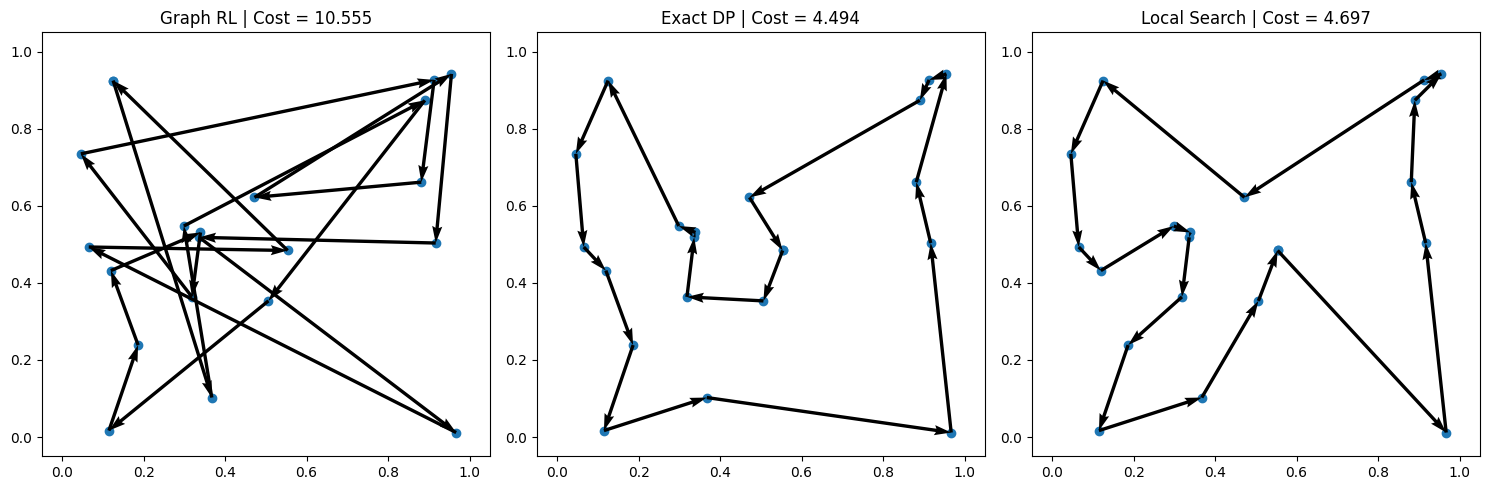

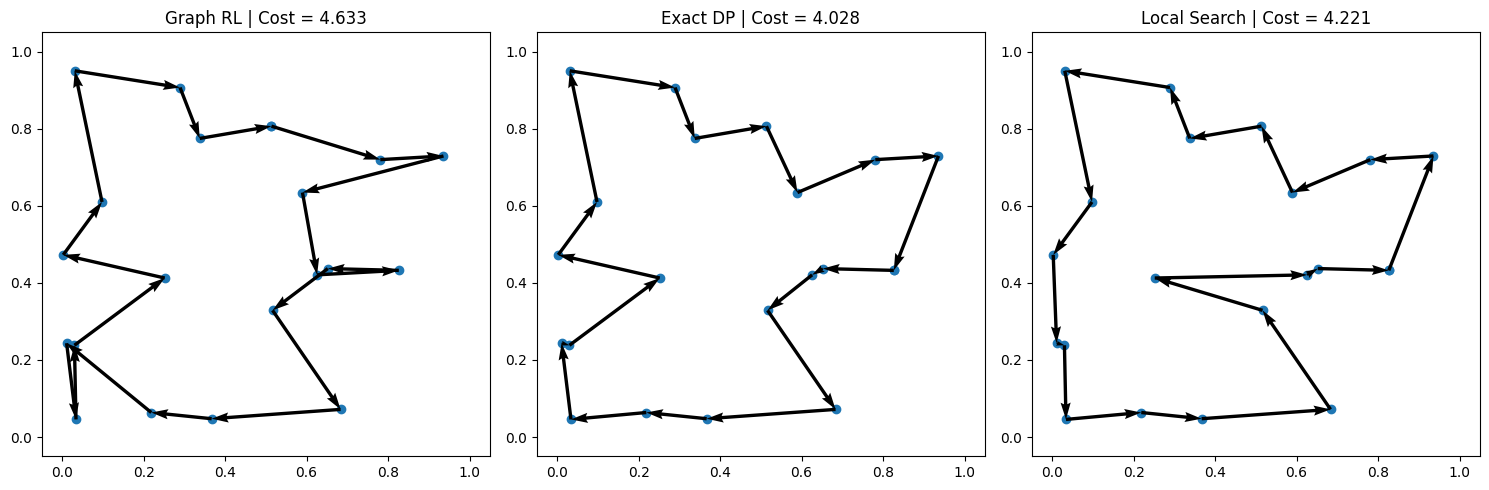

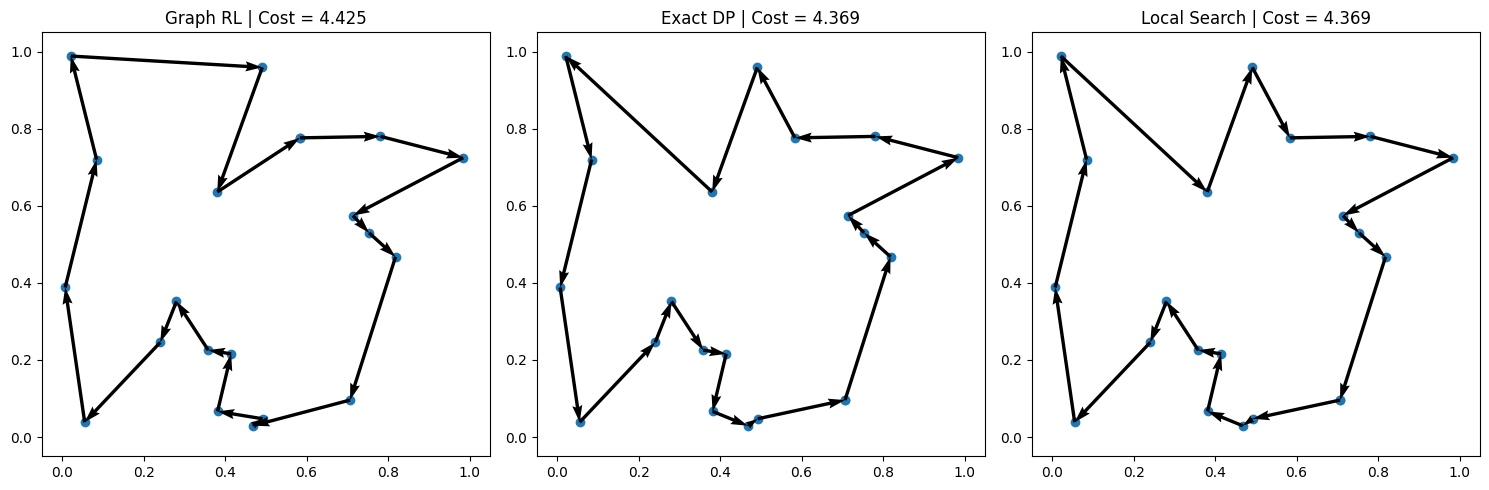

In [44]:
## Visualize experiment results
instance_indices = range(num_instances)
visualize_tsp_solutions(experiment, instance_indices)